In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.style
matplotlib.style.use("seaborn")
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sn
sn.color_palette("hls", 17)
import scipy.stats as st
import math

from pingouin import rcorr



In [2]:
import sys
import os

from sys import platform
if platform == "darwin":
    sys.path.append(os.path.dirname(os.path.realpath(__file__)) + "/..")
    smart_nlp_path = ''
elif platform == "win32":
    sys.path.append('../')
    smart_nlp_path = os.getcwd()
    smart_nlp_path = "\\".join([smart_nlp_path.split("\\")[i] for i in range(0,len(smart_nlp_path.split("\\"))-1)]+["/"])

from module.trend_analysis_functions import *
from module.topic_model_plus_class import Topic_Model_plus

C:\Users\srandrad\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
preprocessed_file = smart_nlp_path+r"\input data\ICS_filtered_preprocessed_combined_data.csv"
sitrep_df = pd.read_csv(preprocessed_file)
sitrep_df = sitrep_df.loc[sitrep_df["START_YEAR"]>2005].reset_index(drop=True)

incident_file = smart_nlp_path+r"input data\summary_reports_cleaned.csv"
incident_summary_df = pd.read_csv(incident_file)
incident_summary_df = incident_summary_df.drop("Unnamed: 0", axis=1)
incident_summary_df = incident_summary_df.loc[incident_summary_df["START_YEAR"]>=2006].reset_index(drop=True)

fire_ids = incident_summary_df['INCIDENT_ID'].unique()
sitrep_ids = sitrep_df['INCIDENT_ID'].unique()
sitrep_df = sitrep_df[sitrep_df['INCIDENT_ID'].isin(fire_ids)].reset_index(drop=True)
incident_summary_df =incident_summary_df[incident_summary_df['INCIDENT_ID'].isin(sitrep_ids)].reset_index(drop=True)
display(sitrep_df)
display(incident_summary_df)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\srandrad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,13,18,19,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


CY       DISCOVERY_DATE                         INCIDENT_ID  \
0      2010  2010-07-15 15:00:00   2000_CA-RRU-062485_VALLEY COMPLEX   
1      2010  2010-07-15 15:00:00   2000_CA-RRU-062485_VALLEY COMPLEX   
2      2010  2010-07-15 15:00:00   2000_CA-RRU-062485_VALLEY COMPLEX   
3      2010  2010-07-15 15:00:00   2000_CA-RRU-062485_VALLEY COMPLEX   
4      2010  2010-07-15 15:00:00   2000_CA-RRU-062485_VALLEY COMPLEX   
...     ...                  ...                                 ...   
44358  2014  2014-03-15 14:30:00  2014_VAVAS1403037_BEAVER LODGE RD.   
44359  2014  2014-03-19 14:00:00  2014_VAVAS1406037_AIRPORT MOUNTAIN   
44360  2014  2014-08-20 13:00:00          2014_WA-WFS-513_SAND RIDGE   
44361  2014  2014-08-20 13:00:00          2014_WA-WFS-513_SAND RIDGE   
44362  2014  2014-08-20 13:00:00          2014_WA-WFS-513_SAND RIDGE   

       PCT_CONTAINED_COMPLETED  START_YEAR  TOTAL_AERIAL  TOTAL_PERSONNEL  \
0                         80.0      2010.0      5.000000       230.000000   
1                         60.0      2010.0      5.000000       230.000000   
2                         30.0      2010.0      4.000000       165.000000   
3                        100.0      2010.0      4.333333       192.333333   
4                         60.0      2010.0      4.333333       192.333333   
...                        ...         ...           ...              ...   
44358                    100.0      2014.0      0.000000        13.000000   
44359                     85.0      2014.0      0.000000        18.500000   
44360                      0.0      2014.0      1.000000        95.000000   
44361                     86.0      2014.0      1.000000       120.000000   
44362                    100.0      2014.0      0.000000        46.000000   

       REPORT_DOY  DISCOVERY_DOY  \
0             197            196   
1             197            196   
2             197            196   
3             197            196   
4             197            196   
...           ...            ...   
44358          74             74   
44359          80             78   
44360         234            232   
44361         235            232   
44362         235            232   

                                           Combined Text  \
0                        ['resource', 'share', 'cactus']   
1      ['resource', 'share', 'incident', 'cactus', 'i...   
2      ['resource', 'share', 'cactus', 'erratic', 'wi...   
3      ['resource', 'share', 'cactus', 'cactus', 'bec...   
4      ['resource', 'share', 'cactus', 'cactus', 'bec...   
...                                                  ...   
44358                        ['fast', 'spread', 'field']   
44359           ['heavy', 'plume', 'primary', 'carrier']   
44360  ['heavy', 'canyon', 'river', 'mainly', 'canyon...   
44361  ['laid', 'night', 'test', 'wind', 'remain', 'c...   
44362  ['report', 'incident', 'wind', 'test', 'overni...   

                                 Unique IDs  
0       2000_CA-RRU-062485_VALLEY COMPLEX_0  
1       2000_CA-RRU-062485_VALLEY COMPLEX_1  
2       2000_CA-RRU-062485_VALLEY COMPLEX_2  
3       2000_CA-RRU-062485_VALLEY COMPLEX_4  
4       2000_CA-RRU-062485_VALLEY COMPLEX_5  
...                                     ...  
44358  2014_VAVAS1403037_BEAVER LODGE RD._0  
44359  2014_VAVAS1406037_AIRPORT MOUNTAIN_1  
44360          2014_WA-WFS-513_SAND RIDGE_0  
44361          2014_WA-WFS-513_SAND RIDGE_1  
44362          2014_WA-WFS-513_SAND RIDGE_2  

[44363 rows x 11 columns]

INCIDENT_ID INCIDENT_NUMBER  \
0       2000_CA-RRU-062485_VALLEY COMPLEX   CA-RRU-062485   
1               2005_OK-CHA-005077_WILLIS   OK-CHA-005077   
2               2006_00276_MILLER COMPLEX           00276   
3           2006_1224_MULTIPLE JUNE FIRES            1224   
4         2006_AK-DAS-612166_JARVIS CREEK   AK-DAS-612166   
...                                   ...             ...   
8986          2014_VAS1400656_SANDY RIDGE      VAS1400656   
8987  2014_VAS1406056_HUNTERS VALLEY WEST      VAS1406056   
8988   2014_VAVAS1403037_BEAVER LODGE RD.    VAVAS1403037   
8989   2014_VAVAS1406037_AIRPORT MOUNTAIN    VAVAS1406037   
8990           2014_WA-WFS-513_SAND RIDGE      WA-WFS-513   

            INCIDENT_NAME INCTYP_ABBREVIATION  FINAL_ACRES CAUSE COMPLEX  \
0          VALLEY COMPLEX                  WF       1312.0     L    True   
1                  WILLIS                  WF        460.0     H   False   
2          MILLER COMPLEX                  WF        300.0     L    True   
3     MULTIPLE JUNE FIRES                  WF         21.0     L   False   
4            JARVIS CREEK                  WF        275.0     H   False   
...                   ...                 ...          ...   ...     ...   
8986          Sandy Ridge                  WF        600.0     H   False   
8987  Hunters Valley West                  WF         80.0     H   False   
8988     Beaver Lodge Rd.                  WF          0.0     H   False   
8989     Airport Mountain                  WF        200.0     H   False   
8990           Sand Ridge                  WF       1900.0     L   False   

           DISCOVERY_DATE  DISCOVERY_DOY EXPECTED_CONTAINMENT_DATE  ...  \
0     2010-07-15 15:00:00            196       2010-07-18 00:00:00  ...   
1     2005-12-30 00:00:00              1       2006-01-05 16:00:00  ...   
2     2006-06-26 19:55:00            177       2006-07-03 18:00:00  ...   
3     2006-06-26 15:00:00            177       2006-07-01 18:00:00  ...   
4     2006-06-08 11:13:00            159       2006-06-13 23:59:00  ...   
...                   ...            ...                       ...  ...   
8986  2014-04-20 17:00:00            110                       NaN  ...   
8987  2014-04-19 08:00:00            109                       NaN  ...   
8988  2014-03-15 14:30:00             74                       NaN  ...   
8989  2014-03-19 14:00:00             78                       NaN  ...   
8990  2014-08-20 13:00:00            232                       NaN  ...   

                    FOD_CAUSE_DESCR FOD_FIRE_SIZE FOD_COMPLEX_NAME  \
0                         Lightning        1289.0   VALLEY COMPLEX   
1     ['Arson' 'Missing/Undefined']         920.0              NaN   
2                               NaN           NaN              NaN   
3                               NaN           NaN              NaN   
4                     Miscellaneous         275.0              NaN   
...                             ...           ...              ...   
8986                  Equipment Use         449.0              NaN   
8987                 Debris Burning          80.0              NaN   
8988                            NaN           NaN              NaN   
8989                          Arson         375.0              NaN   
8990                  Miscellaneous        2080.0              NaN   

                                                FOD_OBJ  \
0     [{"ID" : 1386075, "COORDS" : (33.63888888, -11...   
1     [{"ID" : 251856, "COORDS" : (33.8833, -96.8169...   
2                                                   NaN   
3                                                   NaN   
4     [{"ID" : 311918, "COORDS" : (63.8667, -145.75)...   
...                                                 ...   
8986  [{"ID" : 300083747, "COORDS" : (37.01936111, -...   
8987  [{"ID" : 300001324, "COORDS" : (36.80361111, -...   
8988                                                NaN   
8989  [{"ID" : 300117756, "COORDS" : (37.24325, -82.

## FIRE TREND ANALYSIS
examining trends in frequency, acres burned, and the number of days a fire burns on average per year. Potentially add FSR (WF_MAX_FSR), number of complexes (COMPLEX), evacuations (EVACUATION_REPORTED)


In [4]:
fire_trends_cols = ["FINAL_ACRES", "FOD_DISCOVERY_DOY", "FOD_CONTAIN_DOY", "START_YEAR"]
fire_trends_df = incident_summary_df[fire_trends_cols]
fire_trends_df 

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FINAL_ACRES  FOD_DISCOVERY_DOY  FOD_CONTAIN_DOY  START_YEAR
0          1312.0              196.0            197.0      2010.0
1           460.0                1.0              5.0      2006.0
2           300.0              177.0            184.0      2006.0
3            21.0              177.0            181.0      2006.0
4           275.0              159.0            167.0      2006.0
...           ...                ...              ...         ...
8986        600.0              110.0            114.0      2014.0
8987         80.0              109.0            110.0      2014.0
8988          0.0               74.0             74.0      2014.0
8989        200.0               78.0             82.0      2014.0
8990       1900.0              233.0            234.0      2014.0

[8991 rows x 4 columns]

In [5]:
counts = fire_trends_df["START_YEAR"].value_counts()
counts

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2006.0    1541
2011.0    1406
2008.0    1116
2007.0    1089
2012.0    1040
2010.0     851
2014.0     714
2009.0     624
2013.0     610
Name: START_YEAR, dtype: int64

In [6]:
type(counts)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.series.Series

In [7]:
years = []
count = []
for key in counts.index:
    years.append(key)
years.sort()
count = [counts[year] for year in years]

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


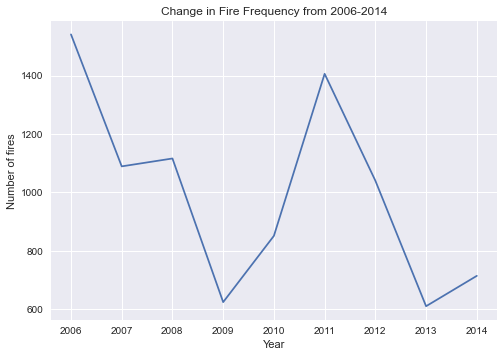

In [8]:
plt.figure()
plt.ylabel("Number of fires")
plt.xlabel("Year")
plt.title("Change in Fire Frequency from 2006-2014")
plt.plot(years, count)
plt.show()

While the above plot does not show a consistent linear trend, these results are consistent with the findings of the authors of the original papers

In [9]:
years =  fire_trends_df["START_YEAR"].unique()
years.sort()

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
years

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.])

In [11]:
average_days_burning = {}
total_days_burning = {}
for year in years:
    list_of_days_burning = []
    temp_df = fire_trends_df.loc[fire_trends_df['START_YEAR']==year]
    for i in range(len(temp_df)):
        start_day = temp_df.iloc[i]['FOD_DISCOVERY_DOY']
        end_day = temp_df.iloc[i]["FOD_CONTAIN_DOY"]
        if not pd.isna(start_day) and not pd.isna(end_day):
            days_burn = end_day - start_day
            list_of_days_burning.append(days_burn)
    average_days_burning[year] = np.average(list_of_days_burning)
    total_days_burning[year] = np.sum(list_of_days_burning)
print(total_days_burning)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{2006.0: 13393.0, 2007.0: 11530.0, 2008.0: 9944.0, 2009.0: 10969.0, 2010.0: 10327.0, 2011.0: 13528.0, 2012.0: 13281.0, 2013.0: 12069.0, 2014.0: 11001.0}


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


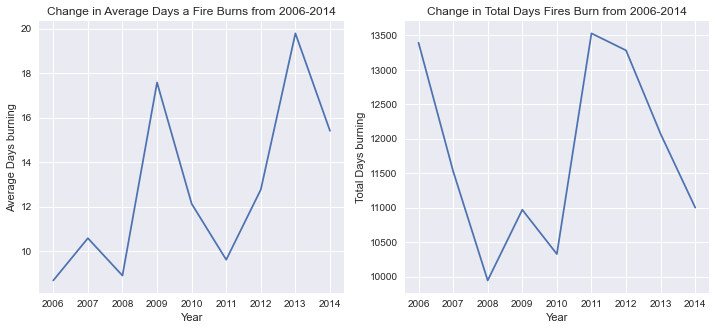

In [12]:
av_days_burn = [average_days_burning[key] for key in average_days_burning]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.ylabel("Average Days burning")
plt.xlabel("Year")
plt.title("Change in Average Days a Fire Burns from 2006-2014")
plt.plot(years, av_days_burn)

total_days_burn = [total_days_burning[key] for key in total_days_burning]
plt.subplot(1,2,2)
plt.ylabel("Total Days burning")
plt.xlabel("Year")
plt.title("Change in Total Days Fires Burn from 2006-2014")
plt.plot(years, total_days_burn)
plt.show()
plt.close()


In [13]:
total_acres = {}
average_acres = {}
for year in years:
    list_of_acres = []
    temp_df = fire_trends_df.loc[fire_trends_df['START_YEAR']==year]
    for i in range(len(temp_df)):
        acres = temp_df.iloc[i]['FINAL_ACRES']
        if not pd.isna(acres):
            list_of_acres.append(acres)
    average_acres[year] = np.average(list_of_acres)
    total_acres[year] = np.sum(list_of_acres)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


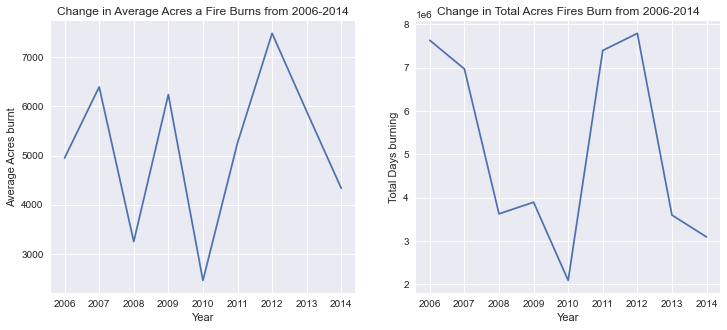

In [14]:
av_acres = [average_acres[key] for key in average_acres]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.ylabel("Average Acres burnt")
plt.xlabel("Year")
plt.title("Change in Average Acres a Fire Burns from 2006-2014")
plt.plot(years, av_acres)

total_acre = [total_acres[key] for key in total_acres]
plt.subplot(1,2,2)
plt.ylabel("Total Days burning")
plt.xlabel("Year")
plt.title("Change in Total Acres Fires Burn from 2006-2014")
plt.plot(years, total_acre)
plt.show()
plt.close()


## Testing Minmax scaling

Minmax scaling is used to maintain the data shape and trend, while scaling it to a size that is consistent accross inputs. This is useful for showing graphs with multiple lines of different values, this way you can see and compare the overall trends without losing much information. Data must be scaled before being used as an input for any model, so for our multiple regression we will use scaled data.

As we can see, the scaled graphs below look the same as the unscaled graphs above, with the only difference being the y-axis values.

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


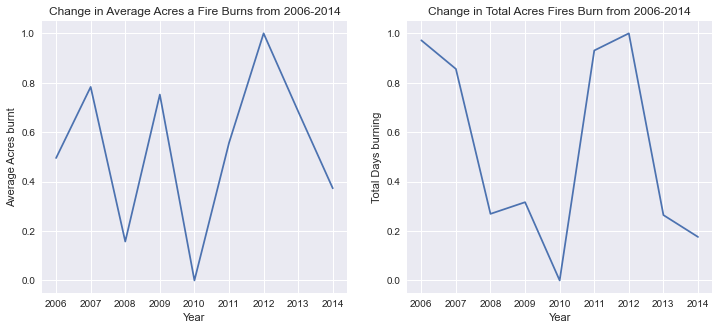

In [15]:
av_acres = [average_acres[key] for key in average_acres]
av_acres_scaled = minmax_scale(av_acres)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.ylabel("Average Acres burnt")
plt.xlabel("Year")
plt.title("Change in Average Acres a Fire Burns from 2006-2014")
plt.plot(years, av_acres_scaled)

total_acre = [total_acres[key] for key in total_acres]
total_acres_scaled = minmax_scale(total_acre)
plt.subplot(1,2,2)
plt.ylabel("Total Days burning")
plt.xlabel("Year")
plt.title("Change in Total Acres Fires Burn from 2006-2014")
plt.plot(years, total_acres_scaled)
plt.show()
plt.close()

#### Graphs

In [16]:
freq_scaled = minmax_scale(count)
av_days_burn_scaled = minmax_scale(av_days_burn)
av_acres_scaled = minmax_scale(av_acres)

total_days_burn_scaled = minmax_scale(total_days_burn)
total_acres_scaled = minmax_scale(total_acre)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


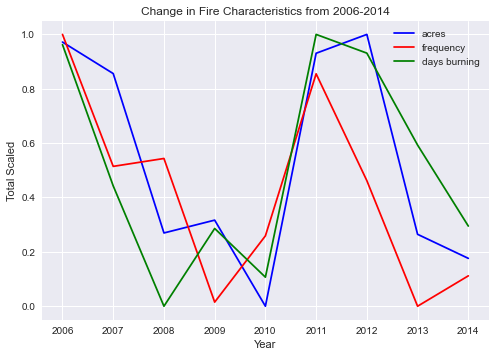

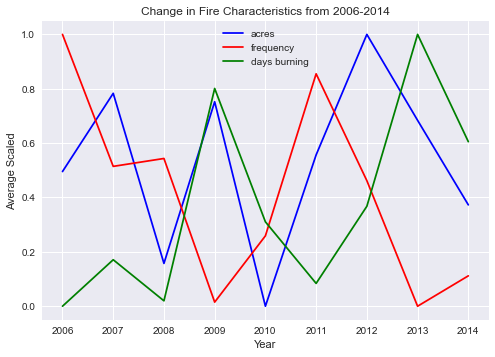

In [17]:
#plt.figure(figsize=(12, 5))
#plt.subplot(1, 2, 1)
plt.figure()
plt.ylabel("Total Scaled")
plt.xlabel("Year")
plt.title("Change in Fire Characteristics from 2006-2014")
plt.plot(years, total_acres_scaled, color="blue", label="acres")
plt.plot(years, freq_scaled, color="red", label="frequency")
plt.plot(years, total_days_burn_scaled, color="green", label="days burning")
plt.legend()
plt.show()

#plt.subplot(1, 2, 2)
plt.figure()
plt.ylabel("Average Scaled")
plt.xlabel("Year")
plt.title("Change in Fire Characteristics from 2006-2014")
plt.plot(years, av_acres_scaled, color="blue", label="acres")
plt.plot(years, freq_scaled, color="red", label="frequency")
plt.plot(years, av_days_burn_scaled, color="green", label="days burning")
plt.legend()
plt.show()
plt.close()

## OPERATIONAL TRENDS ANALYSIS

operational trends are examined as aerial assets (total and max in one day), personnel (total and max in one day), and projected cost.
potentially add number of sit reports (INC_MGMT_NUM_SITREPS)??

In [18]:
operational_trends_cols = ["TOTAL_AERIAL_SUM", "TOTAL_PERSONNEL_SUM", "WF_PEAK_AERIAL", "WF_PEAK_PERSONNEL", "START_YEAR","PROJECTED_FINAL_IM_COST"]
operational_trends_df = incident_summary_df[operational_trends_cols]
operational_trends_df 

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TOTAL_AERIAL_SUM  TOTAL_PERSONNEL_SUM  WF_PEAK_AERIAL  \
0                 29.0               2798.0             5.0   
1                  0.0                 42.0             NaN   
2                  1.0               2578.0             1.0   
3                  7.0               1248.0             2.0   
4                  5.0                712.0             3.0   
...                ...                  ...             ...   
8986               0.0                 44.0             NaN   
8987               0.0                 39.0             NaN   
8988               0.0                 13.0             NaN   
8989               0.0                 55.5             NaN   
8990               2.0                261.0             1.0   

      WF_PEAK_PERSONNEL  START_YEAR  PROJECTED_FINAL_IM_COST  
0                 569.0      2010.0                2024373.0  
1                  42.0      2006.0                  20000.0  
2                 345.0      2006.0                1333486.0  
3                 247.0      2006.0                 300000.0  
4                 112.0      2006.0                 366482.0  
...                 ...         ...                      ...  
8986               22.0      2014.0                   9000.0  
8987               13.0      2014.0                   9000.0  
8988               13.0      2014.0                    450.0  
8989               18.5      2014.0                   5200.0  
8990              120.0      2014.0                 200000.0  

[8991 rows x 6 columns]

In [19]:
operational_trends_df = operational_trends_df.loc[operational_trends_df["TOTAL_PERSONNEL_SUM"].notna()]
#remove rows with no personnel bc all fires would have some personnel, indicates incomplete reporting
operational_trends_df

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TOTAL_AERIAL_SUM  TOTAL_PERSONNEL_SUM  WF_PEAK_AERIAL  \
0                 29.0               2798.0             5.0   
1                  0.0                 42.0             NaN   
2                  1.0               2578.0             1.0   
3                  7.0               1248.0             2.0   
4                  5.0                712.0             3.0   
...                ...                  ...             ...   
8986               0.0                 44.0             NaN   
8987               0.0                 39.0             NaN   
8988               0.0                 13.0             NaN   
8989               0.0                 55.5             NaN   
8990               2.0                261.0             1.0   

      WF_PEAK_PERSONNEL  START_YEAR  PROJECTED_FINAL_IM_COST  
0                 569.0      2010.0                2024373.0  
1                  42.0      2006.0                  20000.0  
2                 345.0      2006.0                1333486.0  
3                 247.0      2006.0                 300000.0  
4                 112.0      2006.0                 366482.0  
...                 ...         ...                      ...  
8986               22.0      2014.0                   9000.0  
8987               13.0      2014.0                   9000.0  
8988               13.0      2014.0                    450.0  
8989               18.5      2014.0                   5200.0  
8990              120.0      2014.0                 200000.0  

[8991 rows x 6 columns]

In [20]:
total_aerial = {}
average_aerial = {}
total_person = {}
average_person = {}
for year in years:
    list_of_person = []
    list_of_aerial = []
    temp_df = operational_trends_df.loc[operational_trends_df['START_YEAR']==year]
    for i in range(len(temp_df)):
        aerial = temp_df.iloc[i]["WF_PEAK_AERIAL"]
        person = temp_df.iloc[i]['WF_PEAK_PERSONNEL']
        list_of_person.append(person)
        if pd.isna(aerial):
            aerial = 0
        list_of_aerial.append(aerial)
    average_aerial[year] = np.average(list_of_aerial)
    total_aerial[year] = np.sum(list_of_aerial)
    average_person[year] = np.average(list_of_person)
    total_person[year] = np.sum(list_of_person)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


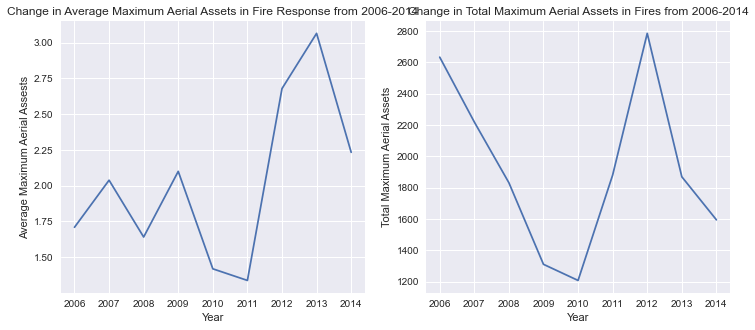

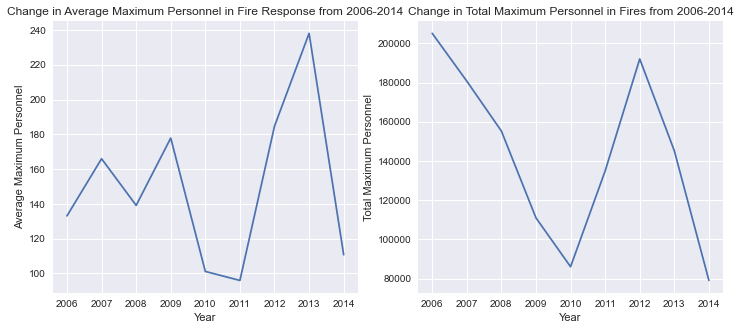

In [21]:
av_aerial = [average_aerial[key] for key in average_aerial]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.ylabel("Average Maximum Aerial Assests")
plt.xlabel("Year")
plt.title("Change in Average Maximum Aerial Assets in Fire Response from 2006-2014")
plt.plot(years, av_aerial)

total_aerial = [total_aerial[key] for key in total_aerial]
plt.subplot(1,2,2)
plt.ylabel("Total Maximum Aerial Assets")
plt.xlabel("Year")
plt.title("Change in Total Maximum Aerial Assets in Fires from 2006-2014")
plt.plot(years, total_aerial)
plt.show()
plt.close()

av_person = [average_person[key] for key in average_person]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.ylabel("Average Maximum Personnel")
plt.xlabel("Year")
plt.title("Change in Average Maximum Personnel in Fire Response from 2006-2014")
plt.plot(years, av_person)

total_person = [total_person[key] for key in total_person]
plt.subplot(1,2,2)
plt.ylabel("Total Maximum Personnel")
plt.xlabel("Year")
plt.title("Change in Total Maximum Personnel in Fires from 2006-2014")
plt.plot(years, total_person)
plt.show()
plt.close()


In [22]:
total_cost = {}
average_cost = {}
for year in years:
    list_of_cost = []
    temp_df = operational_trends_df.loc[operational_trends_df['START_YEAR']==year]
    for i in range(len(temp_df)):
        cost = temp_df.iloc[i]["PROJECTED_FINAL_IM_COST"]
        if not pd.isna(cost):
            list_of_cost.append(cost)
    average_cost[year] = np.average(list_of_cost)
    total_cost[year] = np.sum(list_of_cost)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


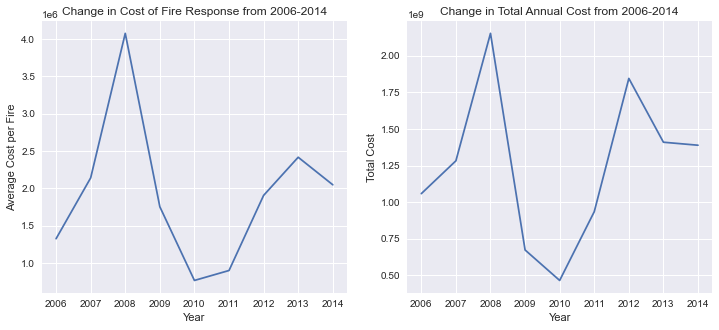

In [23]:
av_cost = [average_cost[key] for key in average_cost]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.ylabel("Average Cost per Fire")
plt.xlabel("Year")
plt.title("Change in Cost of Fire Response from 2006-2014")
plt.plot(years, av_cost)

total_cost = [total_cost[key] for key in total_cost]
plt.subplot(1,2,2)
plt.ylabel("Total Cost")
plt.xlabel("Year")
plt.title("Change in Total Annual Cost from 2006-2014")
plt.plot(years, total_cost)
plt.show()
plt.close()


#### Graphs

In [24]:
av_cost_scaled = minmax_scale(av_cost)
av_person_scaled = minmax_scale(av_person)
av_aerial_scaled = minmax_scale(av_aerial)

total_cost_scaled = minmax_scale(total_cost)
total_person_scaled = minmax_scale(total_person)
total_aerial_scaled = minmax_scale(total_aerial)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


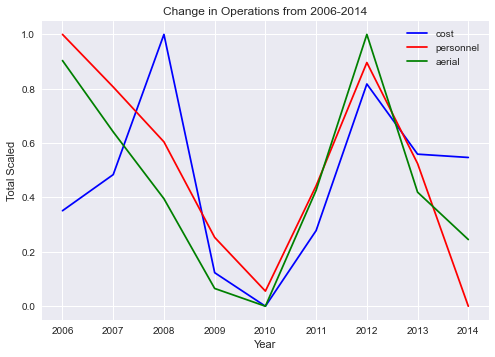

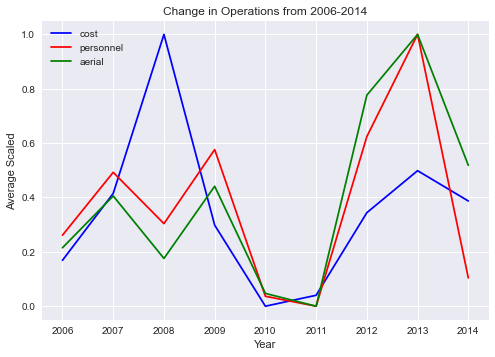

In [25]:
#plt.figure(figsize=(12, 5))
#plt.subplot(1, 2, 1)
plt.figure()
plt.ylabel("Total Scaled")
plt.xlabel("Year")
plt.title("Change in Operations from 2006-2014")
plt.plot(years, total_cost_scaled, color="blue", label="cost")
plt.plot(years, total_person_scaled, color="red", label="personnel")
plt.plot(years, total_aerial_scaled, color="green", label="aerial")
plt.legend()
plt.show()

#plt.subplot(1, 2, 2)
plt.figure()
plt.ylabel("Average Scaled")
plt.xlabel("Year")
plt.title("Change in Operations from 2006-2014")
plt.plot(years, av_cost_scaled, color="blue", label="cost")
plt.plot(years, av_person_scaled, color="red", label="personnel")
plt.plot(years, av_aerial_scaled, color="green", label="aerial")
plt.legend()
plt.show()
plt.close()

## INTENSITY TREND ANALYSIS
intensity is looked at as the number of injuries, number of fatalities, number of structures damaged, number of structures destroyed

In [26]:
intensity_cols = ["STR_DESTROYED_TOTAL","STR_DAMAGED_TOTAL","INJURIES_TOTAL","FATALITIES", "START_YEAR"]
intensity_df = incident_summary_df[intensity_cols]
intensity_df

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STR_DESTROYED_TOTAL  STR_DAMAGED_TOTAL  INJURIES_TOTAL  FATALITIES  \
0                     0.0                0.0             1.0         0.0   
1                     0.0                0.0             1.0         0.0   
2                     0.0                0.0             0.0         0.0   
3                     0.0                0.0             0.0         0.0   
4                     0.0                0.0             0.0         0.0   
...                   ...                ...             ...         ...   
8986                  0.0                0.0             0.0         0.0   
8987                  0.0                0.0             0.0         0.0   
8988                  1.0                1.0             0.0         0.0   
8989                  0.0                0.0             0.0         0.0   
8990                  0.0                0.0             0.0         0.0   

      START_YEAR  
0         2010.0  
1         2006.0  
2         2006.0  
3         2006.0  
4         2006.0  
...          ...  
8986      2014.0  
8987      2014.0  
8988      2014.0  
8989      2014.0  
8990      2014.0  

[8991 rows x 5 columns]

In [27]:
total_str_des = {}
average_str_des = {}
total_str_damage = {}
average_str_damage = {}
total_injuries = {}
average_injuries = {}
total_fatalities = {}
average_fatalities = {}

for year in years:
    list_of_dest = []
    list_of_dam = []
    list_of_injury = []
    list_of_fatalities = []
    temp_df =intensity_df.loc[intensity_df['START_YEAR']==year]
    for i in range(len(temp_df)):
        dest = temp_df.iloc[i]["STR_DESTROYED_TOTAL"]
        damage = temp_df.iloc[i]["STR_DAMAGED_TOTAL"]
        injury = temp_df.iloc[i]["INJURIES_TOTAL"]
        fatality = temp_df.iloc[i]["FATALITIES"]
        list_of_dest.append(dest)
        list_of_dam.append(damage)
        list_of_injury.append(injury)
        list_of_fatalities.append(fatality)
    total_str_des[year] = np.sum(list_of_dest)
    average_str_des[year] = np.average(list_of_dest)
    total_str_damage[year] = np.sum(list_of_dam)
    average_str_damage[year] = np.average(list_of_dam)
    total_injuries[year] = np.sum(list_of_injury)
    average_injuries[year] = np.average(list_of_injury)
    total_fatalities[year] = np.sum(list_of_fatalities)
    average_fatalities[year] = np.average(list_of_fatalities)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


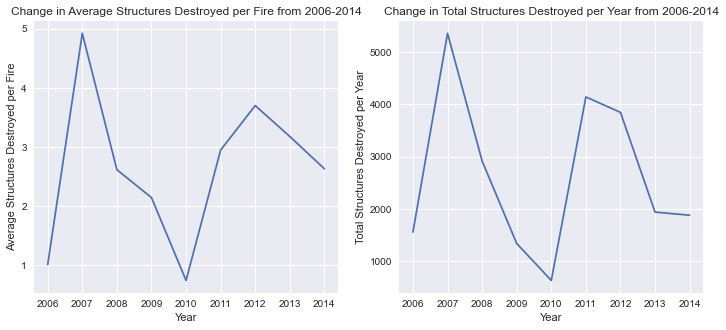

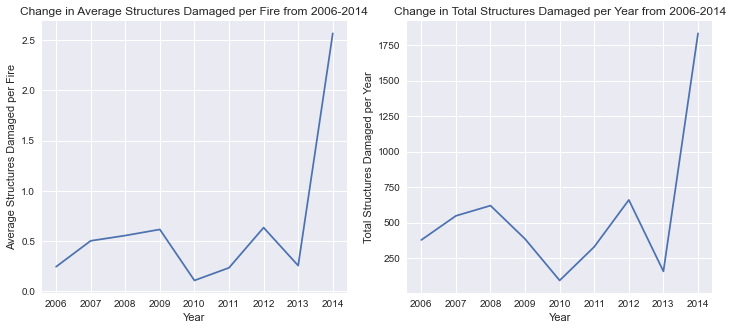

In [28]:
av_des = [average_str_des[key] for key in average_str_des]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.ylabel("Average Structures Destroyed per Fire")
plt.xlabel("Year")
plt.title("Change in Average Structures Destroyed per Fire from 2006-2014")
plt.plot(years, av_des)

total_des = [total_str_des[key] for key in total_str_des]
plt.subplot(1,2,2)
plt.ylabel("Total Structures Destroyed per Year")
plt.xlabel("Year")
plt.title("Change in Total Structures Destroyed per Year from 2006-2014")
plt.plot(years, total_des)
plt.show()
plt.close()

av_damage = [average_str_damage[key] for key in average_str_damage]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.ylabel("Average Structures Damaged per Fire")
plt.xlabel("Year")
plt.title("Change in Average Structures Damaged per Fire from 2006-2014")
plt.plot(years, av_damage)

total_damage = [total_str_damage[key] for key in total_str_damage]
plt.subplot(1,2,2)
plt.ylabel("Total Structures Damaged per Year")
plt.xlabel("Year")
plt.title("Change in Total Structures Damaged per Year from 2006-2014")
plt.plot(years, total_damage)
plt.show()
plt.close()


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


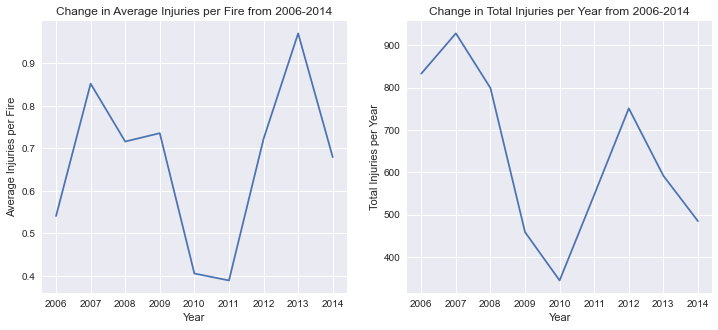

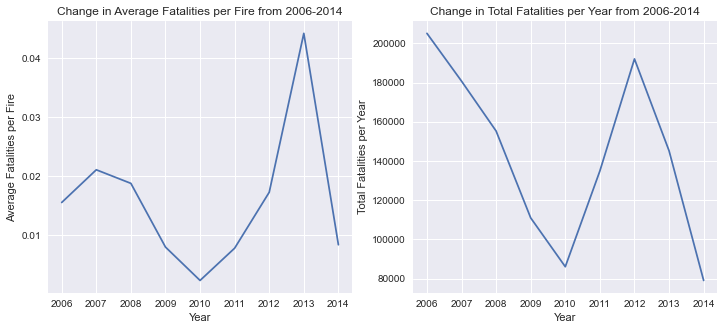

In [29]:
av_injury = [average_injuries[key] for key in average_injuries]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.ylabel("Average Injuries per Fire")
plt.xlabel("Year")
plt.title("Change in Average Injuries per Fire from 2006-2014")
plt.plot(years, av_injury)

total_injury = [total_injuries[key] for key in total_injuries]
plt.subplot(1,2,2)
plt.ylabel("Total Injuries per Year")
plt.xlabel("Year")
plt.title("Change in Total Injuries per Year from 2006-2014")
plt.plot(years, total_injury)
plt.show()
plt.close()

av_fatality = [average_fatalities[key] for key in average_fatalities]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.ylabel("Average Fatalities per Fire")
plt.xlabel("Year")
plt.title("Change in Average Fatalities per Fire from 2006-2014")
plt.plot(years, av_fatality)

total_fatality = [total_fatalities[key] for key in total_fatalities]
plt.subplot(1,2,2)
plt.ylabel("Total Fatalities per Year")
plt.xlabel("Year")
plt.title("Change in Total Fatalities per Year from 2006-2014")
plt.plot(years, total_person)
plt.show()
plt.close()


#### Graphs

In [30]:
total_fatality_scaled = minmax_scale(total_fatality)
total_injury_scaled = minmax_scale(total_injury)
total_damage_scaled = minmax_scale(total_damage)
total_des_scaled = minmax_scale(total_des)

av_fatality_scaled = minmax_scale(av_fatality)
av_injury_scaled = minmax_scale(av_injury)
av_damage_scaled = minmax_scale(av_damage)
av_des_scaled = minmax_scale(av_des)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


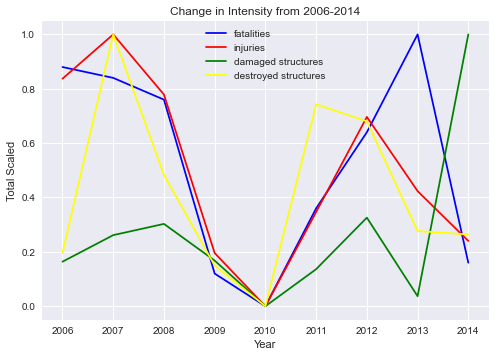

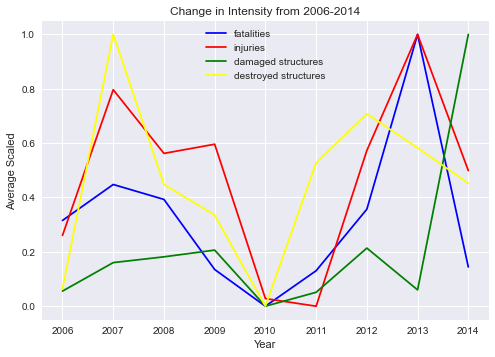

In [31]:
plt.figure()#(figsize=(12, 5))
#plt.subplot(1, 2, 1)
plt.ylabel("Total Scaled")
plt.xlabel("Year")
plt.title("Change in Intensity from 2006-2014")
plt.plot(years, total_fatality_scaled, color="blue", label="fatalities")
plt.plot(years, total_injury_scaled, color="red", label="injuries")
plt.plot(years, total_damage_scaled, color="green", label="damaged structures")
plt.plot(years, total_des_scaled, color="yellow", label="destroyed structures")
plt.legend()
plt.show()

#plt.subplot(1, 2, 2)
plt.figure()
plt.ylabel("Average Scaled")
plt.xlabel("Year")
plt.title("Change in Intensity from 2006-2014")
plt.plot(years, av_fatality_scaled, color="blue", label="fatalities")
plt.plot(years, av_injury_scaled, color="red", label="injuries")
plt.plot(years, av_damage_scaled, color="green", label="damaged structures")
plt.plot(years, av_des_scaled, color="yellow", label="destroyed structures")
plt.legend()
plt.show()
plt.close()

## Correlation Matrix

In [32]:
avs_df = pd.DataFrame({
    "fire frequency": count,
    "average days fire burns": av_days_burn,
    "average acres fire burns": av_acres,
    "average aerial assets per fire": av_aerial,
    "average personnel per fire": av_person,
    "average cost per fire": av_cost,
    "average structures damaged per fire": av_damage,
    "average structures destroyed per fire": av_des,
    "average injuries per fire": av_injury,
    "average fatalities per fire": av_fatality
})

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


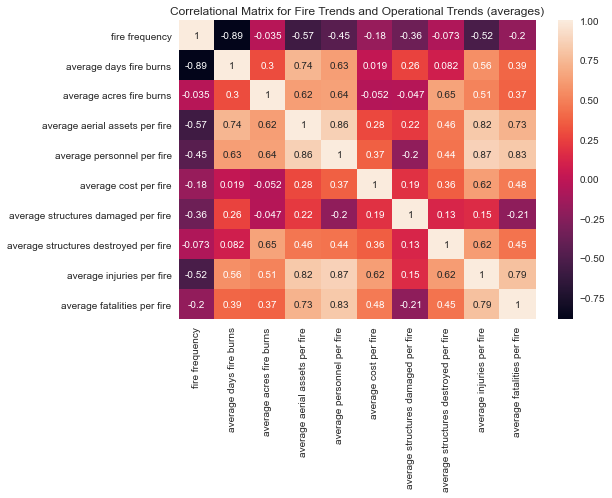

In [33]:
corrMatrix = avs_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title("Correlational Matrix for Fire Trends and Operational Trends (averages)")
plt.show()

As seen above, fire frequency is negatively correlated with assets, indicating higher frequencies may be smaller fires, where lower frequencies are related to larger fires, thus more assets. 

The average days the fire burns is weakly correlated with max assets, would likely be closer correlated with total assets accross an operation. Negatively correlated with fire frequency, indication longer fires occur less frequently.

average acres burned is moderately positively correlated with assets, but for some reason is negatively correlated with days burning (could be due to outliers)

average maximum aerial assets is strongest correlated with personnel, which makes sense. Also positively correlated with acres burned, days burning, and cost, indicating more aerial support is needed in more intense fires.

average maximum personnel is positively correlated with acres burned and days burning

cost is most strongly associated with days burning, assets, and personnel, but it is still moderate. Cost can likely be explained better by number of structures damages

In [34]:
totals_df = pd.DataFrame({
    "fire frequency": count,
    "total days fires burned": total_days_burn,
    "total acres fires burned": total_acre,
    "total aerial assets": total_aerial,
    "total personnel": total_person,
    "total cost": total_cost,
    "total structures damaged": total_damage,
    "total structures destroyed": total_des,
    "total injuries": total_injury,
    "total fatalities": total_fatality
})

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


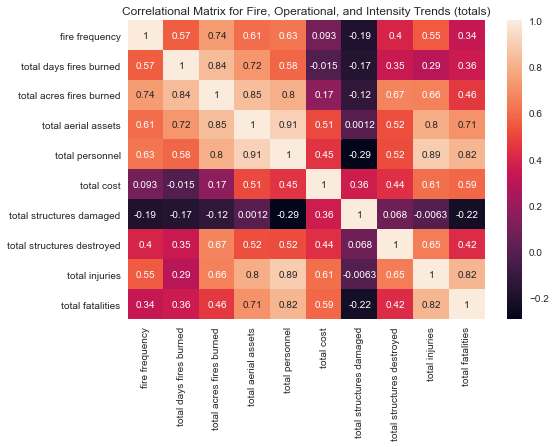

In [35]:
corrMatrix = totals_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title("Correlational Matrix for Fire, Operational, and Intensity Trends (totals)")
plt.show()

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


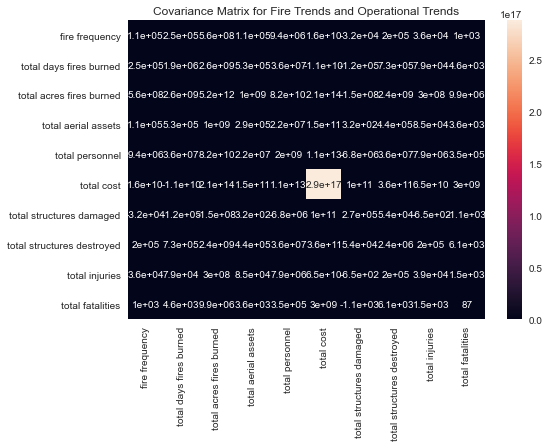

In [36]:
covMatrix = pd.DataFrame.cov(totals_df)
sn.heatmap(covMatrix, annot=True)
plt.title("Covariance Matrix for Fire Trends and Operational Trends")
plt.show()

In [37]:
totals = {"Fire Frequency": count,
    "total Days Fires Burned": total_days_burn,
    "total Acres Fires Burned": total_acre,
    "total Aerial Assets": total_aerial,
    "total Personnel": total_person,
    "total Cost": total_cost,
    "total Structures Damaged": total_damage,
    "total Structures Destroyed": total_des,
    "total Injuries": total_injury,
    "total Fatalities": total_fatality}
averages = {
    "fire frequency": count,
    "average days fire burns": av_days_burn,
    "average acres fire burns": av_acres,
    "average aerial assets per fire": av_aerial,
    "average personnel per fire": av_person,
    "average cost per fire": av_cost,
    "average structures damaged per fire": av_damage,
    "average structures destroyed per fire": av_des,
    "average injuries per fire": av_injury,
    "average fatalities per fire": av_fatality}

totals_scaled = {feature:minmax_scale(totals[feature]) for feature in totals}

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
print(totals_scaled)

{'Fire Frequency': [1.0, 0.514500537056928, 0.5435016111707841, 0.015037593984962405, 0.2588614393125671, 0.8549946294307197, 0.46186895810955964, 0.0, 0.11170784103114931], 'total Days Fires Burned': [0.9623325892857143, 0.44252232142857145, 0.0, 0.28599330357142855, 0.10686383928571429, 1.0, 0.9310825892857143, 0.5929129464285714, 0.294921875], 'total Acres Fires Burned': [0.9718399297343963, 0.8559107048072577, 0.2695007751643019, 0.3166635463991904, 0.0, 0.9306377440015088, 1.0, 0.26453174847731853, 0.17606718983375605], 'total Aerial Assets': [0.9036755386565273, 0.641318124207858, 0.39543726235741444, 0.06527249683143219, 0.0, 0.426489226869455, 1.0, 0.41951837769328265, 0.24529995775242933], 'total Personnel': [1.0, 0.8066299127427908, 0.6046268449490481, 0.25314513905898794, 0.05553719468139172, 0.44315033601836173, 0.8964740709074, 0.5248362224231247, 0.0], 'total Cost': [0.35130017253433177, 0.4841814418615539, 1.0, 0.12332856438505932, 0.0, 0.278301704446107, 0.8176062253304

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
lines = {"Fire Frequency": '--',
    "total Days Fires Burned": '--',
    "total Acres Fires Burned": '--',
    "total Aerial Assets": '-',
    "total Personnel": '-',
    "total Cost": '-',
    "total Structures Damaged": ':',
    "total Structures Destroyed": ':',
    "total Injuries": ':',
    "total Fatalities": ':'}
colors = cm.tab10(np.linspace(0, 1, len(lines)))
colors_dict = {}
i = 0
for feature in lines:
    colors_dict[feature] = colors[i]
    i+=1
markers = {"Fire Frequency": '.',
    "total Days Fires Burned": 'v',
    "total Acres Fires Burned": '^',
    "total Aerial Assets": 's',
    "total Personnel": 'p',
    "total Cost": 'P',
    "total Structures Damaged": 'h',
    "total Structures Destroyed": 'X',
    "total Injuries": 'D',
    "total Fatalities": '*'}

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


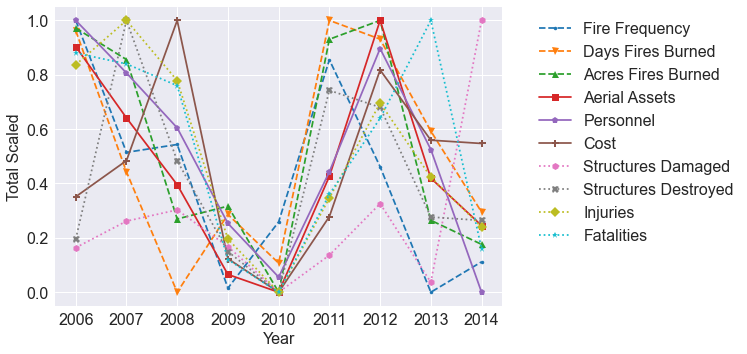

In [40]:
plt.figure()
plt.ylabel("Total Scaled", fontsize=16)
plt.xlabel("Year", fontsize=16)
#plt.title("Fire, Operations, and Intensity Trends from 2006-2014")
#years = [year.strip(".") for year in years]
for feature in totals_scaled:
    plt.plot(years, totals_scaled[feature], label=feature.replace("total ",""), linestyle=lines[feature], marker=markers[feature], color=colors_dict[feature])
    plt.tick_params(labelsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.show()

## HAZARD METRIC ANALYSIS

In [41]:
document_id_col = "INCIDENT_ID"
extra_cols = ["CY","DISCOVERY_DATE", "START_YEAR", "REPORT_DOY", "DISCOVERY_DOY",
              "TOTAL_PERSONNEL", "TOTAL_AERIAL", "PCT_CONTAINED_COMPLETED"]
list_of_attributes = ["Combined Text"]
file = smart_nlp_path+r"\input data\ICS_filtered_preprocessed_combined_data.csv"

ICS = Topic_Model_plus(document_id_col=document_id_col, extra_cols=extra_cols, list_of_attributes=list_of_attributes, combine_cols=False)
ICS.extract_preprocessed_data(file)
years = ICS.data_df['CY'].unique()
years.sort()
years = [str(float(year)) for year in years]

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Preprocessed data extracted from:  C:\Users\srandrad\smart_nlp\/\input data\ICS_filtered_preprocessed_combined_data.csv


In [42]:
len(ICS.data_df)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


44363

In [43]:
preprocessed_df = ICS.data_df
hazard_file = smart_nlp_path+r"\output data\hazard_interpretation_v2.xlsx"

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
time_of_occurence_days, time_of_occurence_pct_contained, frequency, fires, frequency_fires, categories, hazards = calc_metrics(hazard_file, years, preprocessed_df, rm_outliers=True)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\srandrad\Anaconda3\lib\site-packages\openpyxl\compat\numbers.py:41: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpy.float,
100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [04:59<00:00, 33.25s/it]


In [45]:
def check_anamolies(time_of_occurence_days, time_of_occurence_pct_contained, frequency, fires, categories, hazards):
    anomolous_hazards = {'OTTO days':{},
                        'OTTO pct': {},
                        'frequency days': {},
                        'frequency pct': {}}
    for hazard in hazards:
        years_anom_days = []
        years_anom_pct = []
        years_anom_days_missing_nums = []
        years_anom_pct_missing_nums = []
        for year in time_of_occurence_days[hazard]:
            if time_of_occurence_days[hazard][year] == []:
                years_anom_days.append(year)
            if time_of_occurence_pct_contained[hazard][year] == []:
                years_anom_pct.append(year)
            if len(time_of_occurence_days[hazard][year]) != frequency[hazard][year]:
                years_anom_days_missing_nums.append(year)
            if len(time_of_occurence_pct_contained[hazard][year]) != frequency[hazard][year]:
                years_anom_pct_missing_nums.append(year)
        if years_anom_days != []:
            anomolous_hazards['OTTO days'][hazard] = years_anom_days
        if years_anom_pct != []:
            anomolous_hazards['OTTO pct'][hazard] = years_anom_pct
        if years_anom_days_missing_nums != []:
            anomolous_hazards['frequency days'][hazard] = years_anom_days_missing_nums
        if years_anom_pct_missing_nums != []:
            anomolous_hazards['frequency pct'][hazard] = years_anom_pct_missing_nums
    return anomolous_hazards
        

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
check_anamolies(time_of_occurence_days, time_of_occurence_pct_contained, frequency, fires, categories, hazards)
#these are all due to outlier removal

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'OTTO days': {},
 'OTTO pct': {},
 'frequency days': {'Command Transitions': ['2006.0',
   '2007.0',
   '2008.0',
   '2009.0',
   '2010.0',
   '2011.0',
   '2012.0',
   '2013.0',
   '2014.0'],
  'Cultural Resources': ['2006.0',
   '2007.0',
   '2008.0',
   '2009.0',
   '2010.0',
   '2011.0',
   '2012.0',
   '2013.0',
   '2014.0'],
  'Traffic': ['2006.0',
   '2007.0',
   '2008.0',
   '2009.0',
   '2010.0',
   '2011.0',
   '2012.0',
   '2013.0',
   '2014.0'],
  'Hazardous Terrain': ['2006.0',
   '2007.0',
   '2008.0',
   '2009.0',
   '2010.0',
   '2011.0',
   '2012.0',
   '2013.0',
   '2014.0'],
  'Livestock': ['2006.0',
   '2007.0',
   '2009.0',
   '2010.0',
   '2011.0',
   '2012.0',
   '2013.0',
   '2014.0'],
  'Evacuations': ['2006.0',
   '2007.0',
   '2008.0',
   '2009.0',
   '2010.0',
   '2012.0',
   '2013.0',
   '2014.0'],
  'Injuries': ['2006.0',
   '2007.0',
   '2008.0',
   '2009.0',
   '2010.0',
   '2011.0',
   '2012.0',
   '2013.0'],
  'Military Base': ['2006.0', '2008.0', '20

### Hazards, metrics, primary results table

In [47]:
table_data = create_primary_results_table(time_of_occurence_days, time_of_occurence_pct_contained, frequency, fires, preprocessed_df, categories, hazards, years, interval=False)
display(pd.DataFrame(table_data))

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hazard Category          Hazard Name       OTTO days  \
0                    Mission  Command Transitions  14.646+-15.678   
1   Wildland Urban Interface   Cultural Resources   14.535+-12.97   
2                    Mission              Traffic  12.782+-12.938   
3              Environmental    Hazardous Terrain  11.453+-12.461   
4             Human Factors?       Law Violations   6.442+-15.265   
5   Wildland Urban Interface            Livestock  11.541+-10.878   
6                    Mission          Evacuations   11.689+-12.54   
7             Human Factors?             Injuries  12.213+-12.149   
8   Wildland Urban Interface        Military Base  17.553+-15.173   
9   Wildland Urban Interface       Infrastructure  13.538+-14.022   
10             Environmental      Extreme Weather    8.161+-9.312   
11             Environmental           Ecological   11.65+-11.028   
12                   Mission      Resource Issues  13.939+-13.529   
13             Environmental               Floods  28.028+-25.172   
14                   Mission   Inaccurate Mapping     8.384+-9.36   
15                   Mission     Aerial Grounding  15.451+-13.803   
16             Environmental          Dry Weather  11.302+-12.568   

                          OTTO days interval          OTTO %  \
0   (14.157903754322732, 15.134551456376233)  62.988+-36.788   
1   (14.082517421184246, 14.988164036818922)  41.051+-32.976   
2   (12.489108694245353, 13.074222865094722)  47.463+-34.788   
3   (11.245986534303666, 11.660745482418259)  51.123+-35.701   
4      (4.59912868038347, 8.284766450702673)  90.715+-22.478   
5   (10.959921758826438, 12.122361413894096)   32.08+-29.374   
6   (11.364722386778876, 12.012862322169862)  38.866+-32.655   
7    (11.572433839607996, 12.85325158607743)  56.687+-33.858   
8    (16.42167599358741, 18.683359977635615)  57.767+-32.201   
9     (13.0129814796658, 14.063660856100622)  45.794+-33.267   
10      (7.9009476004059, 8.422000882591455)   45.87+-35.018   
11  (10.974822734938419, 12.326053603912603)   44.681+-32.58   
12  (13.617379072202468, 14.260802478481658)  40.252+-32.898   
13  (24.620305543606204, 31.436032484562812)  78.966+-27.307   
14    (7.778685383623848, 8.989210494901098)   64.253+-34.11   
15  (14.894948323506915, 16.007161381134438)  38.478+-32.276   
16  (10.883337141026729, 11.721287136429918)  55.714+-35.075   

                             OTTO % interval  Total Frequency  \
0     (61.86705285895407, 64.10974752770615)             4213   
1    (39.90388941613784, 42.198124429047816)             3273   
2     (46.68781453015492, 48.23898319359056)             7929   
3     (50.54444340160751, 51.70241812211074)            14817   
4     (88.00174001494048, 93.42897159554641)              267   
5     (30.52325992700903, 33.63577797386561)             1418   
6     (38.03833595772952, 39.69398305246944)             6052   
7    (54.93467141243922, 58.438763914403616)             1460   
8      (55.4109627938964, 60.12301778862786)              728   
9     (44.56383538086685, 47.02492306808371)             2881   
10  (44.919622136259015, 46.820328045768186)             5267   
11     (42.7143058050784, 46.64694183197263)             1068   
12    (39.48308139820638, 41.02106986707652)             7167   
13    (75.21517292635227, 82.71719422340618)              225   
14    (62.11217401518421, 66.39303538216002)             1019   
15   (37.185869451708015, 39.76973238086174)             2490   
16    (54.58078582914645, 56.84739771687582)             3704   

    Total Fire Frequency  Average Occurrences per year  \
0                   1397                       155.222   
1                    530                        58.889   
2                   1631                       181.222   
3                   2382                       264.667   
4                    232                        25.778   
5                    375                        41.667   
6                   1454                

### Metrics Time Series
frequency and OTTO in pct containment

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


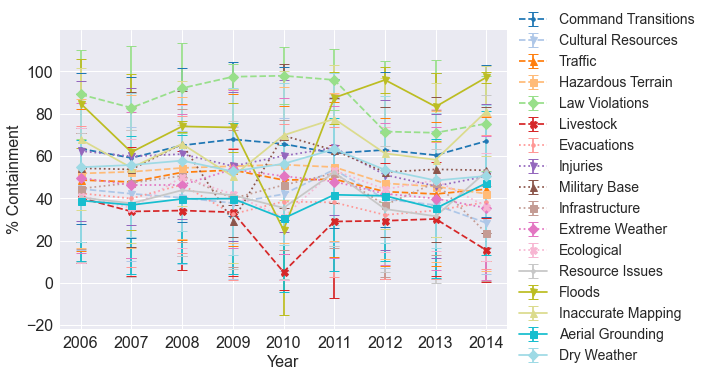

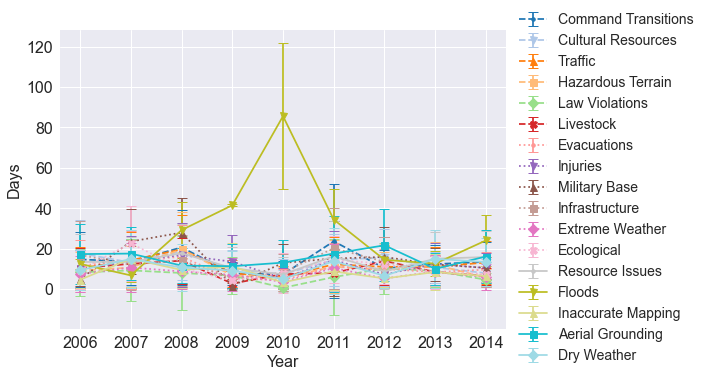

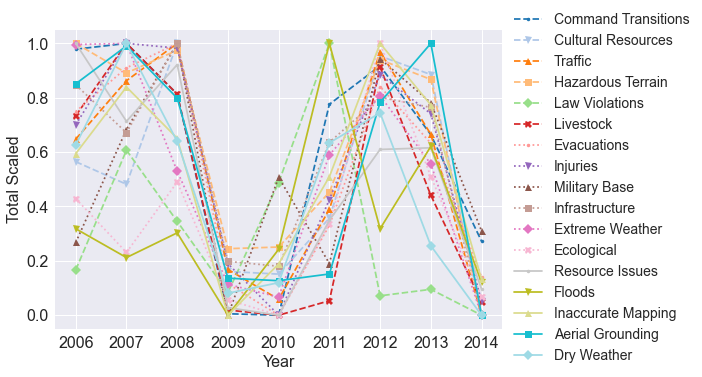

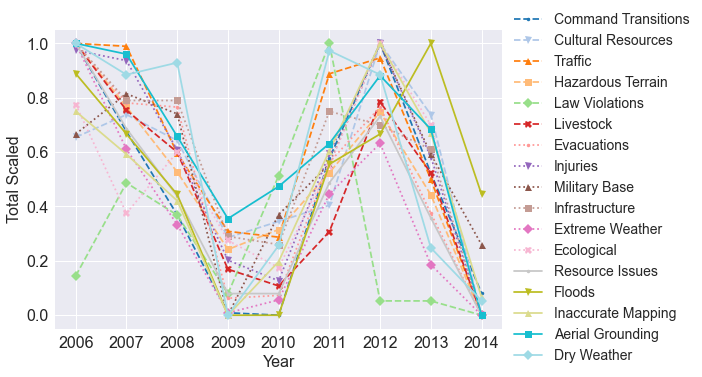

In [48]:
days_averages, days_stddevs, pct_averages, pct_stddevs, frequencies, hazard_freqs_scaled, frequencies_fire, fire_freqs_scaled = create_metrics_time_series(time_of_occurence_days, time_of_occurence_pct_contained, frequency, frequency_fires, fires, years, combined=True)

### Correlation Matrix

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


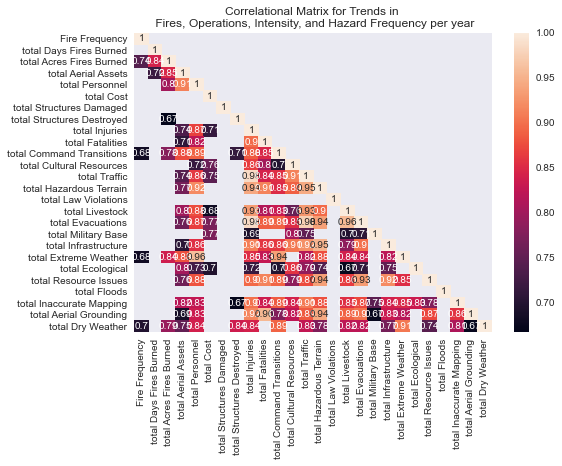

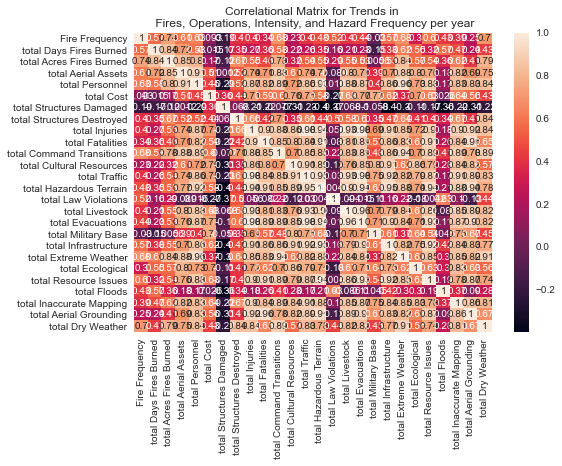

In [49]:
corrMatrix, correlation_mat_total, p_values = create_correlation_matrix(totals_scaled, hazard_freqs_scaled)

In [50]:
def reshape_correlation_matrix(corrMatrix, p_values, predictors, hazards):
    """
    reshapes the correlation matrix between all predictors and all hazard frequencies
    columns are predictors and rows are hazards
    arguments are outputs from create_correlation_matrix
    
    ARGUMENTS
    ---------
    correlation_mat_total: dataframe
        correlation matrix df with columns/rows as predictor and hazard names, values as correlation coefficients
    correlation_mat_sig: dataframe
        df with columns/rows as predictor and hazard names, values as correlation coefficient p-values
    predictors: list
        list of predictor names
    hazards: list
        list of hazard names
    """
    new_corr_data = {predictor.replace("total ",""):[] for predictor in predictors}
    new_p_val_data = {predictor:[] for predictor in predictors}
    annotation_data = {predictor:[] for predictor in predictors}
    
    i = 0
    for hazard in hazards:
        j = 0
        for predictor in predictors: 
            r = round(corrMatrix[hazard][predictor],2)
            new_corr_data[predictor.replace("total ","")].append(r)
            p_val = p_values[i][j]
            new_p_val_data[predictor].append(p_val)
            notation = ""
            if p_val < 0.05:
                notation = "*"
            if p_val < 0.01:
                notation = "**"
            if p_val < 0.001:
                notation = "***"
            annotation_data[predictor].append(str(r)+notation)
            j += 1
        i += 1
    hazards = [h.replace("total ", "") for h in hazards]
    new_corr_df = pd.DataFrame(new_corr_data, index=hazards)
    annotation_df = pd.DataFrame(annotation_data, index=hazards)
   
    fig, (cax, ax) = plt.subplots(nrows=2, figsize=(8,8.025),  gridspec_kw={"height_ratios":[0.025, 1]})

    # Draw heatmap
    sn.set(font_scale=1.5)
    sn.heatmap(new_corr_df, annot=annotation_df, annot_kws={'fontsize':16}, fmt="s",# cbar_kws={"orientation": "horizontal"}, 
               vmin=-1, vmax=1, center= 0, cbar=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.xlabel("Predictor")
    plt.ylabel("Hazard")

    # colorbar
    fig.colorbar(ax.get_children()[0], cax=cax, orientation="horizontal")

    plt.show()

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


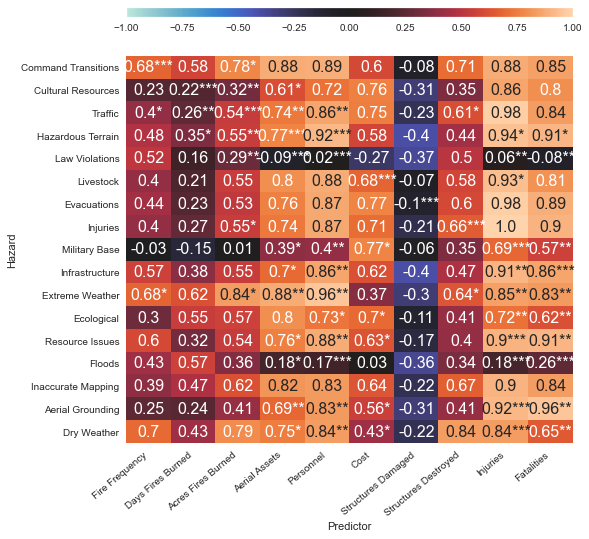

In [51]:
predictors = [p for p in totals_scaled]
hazards = ["total "+h for h in hazard_freqs_scaled]
reshape_correlation_matrix(corrMatrix, p_values, predictors, hazards)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


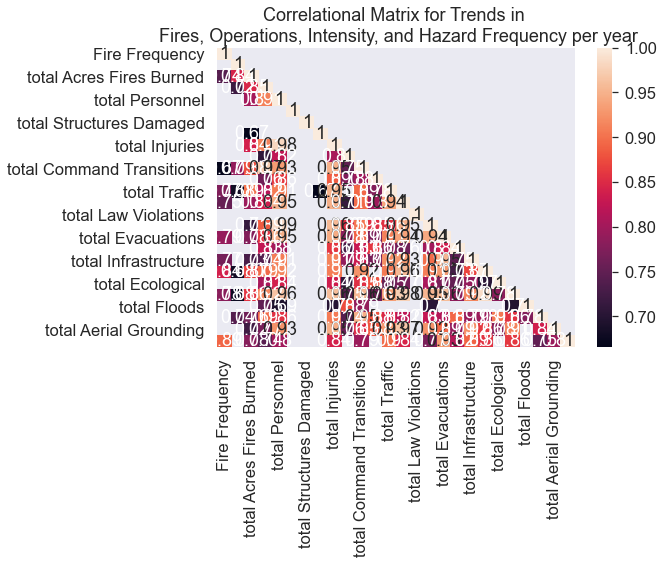

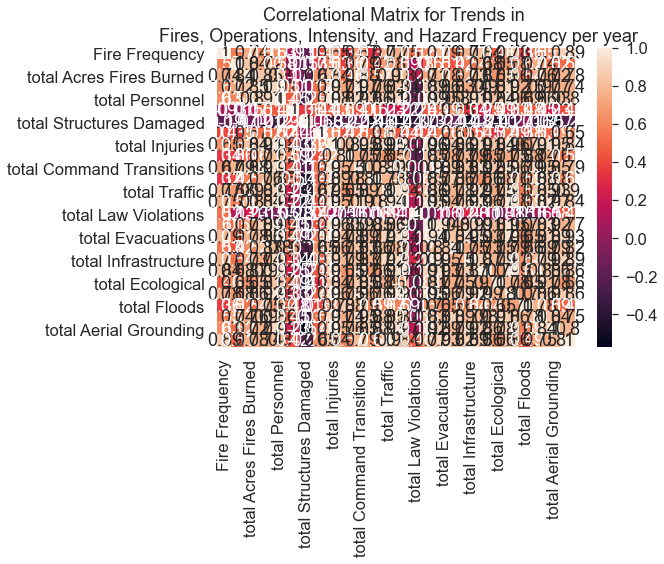

In [52]:
corrMatrix_fires, correlation_mat_total_fires, p_values = create_correlation_matrix(totals_scaled, fire_freqs_scaled)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


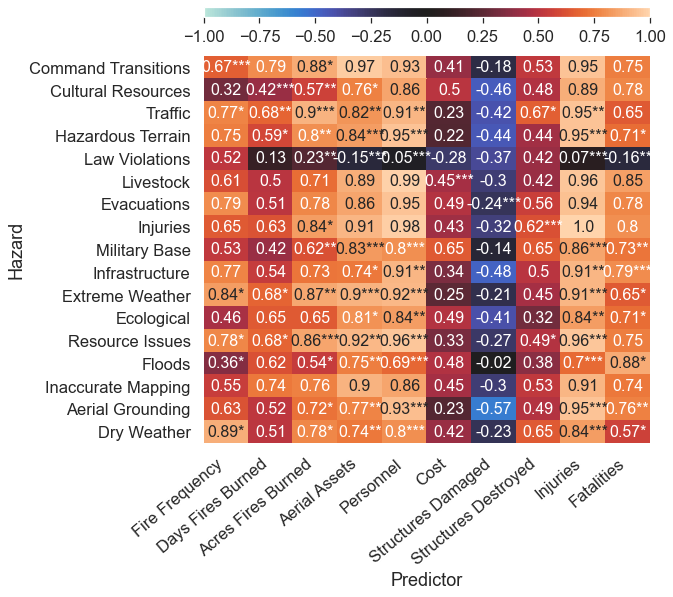

In [53]:
predictors = [p for p in totals_scaled]
hazards = ["total "+h for h in fire_freqs_scaled]
reshape_correlation_matrix(corrMatrix_fires, p_values, predictors, hazards)

# Multiple regression
typically multiple regression is used as a prediction algorithm, given a certain set of continuous inputs X=(x1,2,...xn), what is the value of continuous variable y? Multiple regression uses a linear combination of X to produce y, and the error in y/goodness of fit indicates how good the predictors are.

The importance of a predictor, xi, is evaluated by shuffling its input values, and seeing how the goodness of fit/error changes.

### Our goal: 
use regression to determine what the most important predictors are for the frequency of hazards. Since we have a limited number of data points (9) we will not be predicting on unseen data.

#### Inputs/Predictors: 
All operations trends, fire characteristics, and intensity
#### Output/y: 
annual frequency of hazards time series
#### Method:
for each hazard, use its frequency time series:
1. fit linear regression model to the X,y
2. calculate correlation coefficient
For each Xi:
3. Randomly shuffle the input values
4. Have the full model predict the y value
5. record correlation coefficient
5. record (orignal coefficient-shuffled xi coefficient) -> positive large delta means importance, negative delta indicates it should be removed, small delta means little importance

Future goal: use ML to determine whether or not a hazard will occur based on past incident reports

Feature: 0, Score: 0.40392
Feature: 1, Score: 0.13368
Feature: 2, Score: -0.19897
Feature: 3, Score: 0.32312
Feature: 4, Score: -0.12306
Feature: 5, Score: 0.05550
Feature: 6, Score: 0.04650
Feature: 7, Score: 0.37342
Feature: 8, Score: 0.10431
Feature: 9, Score: 0.46503


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


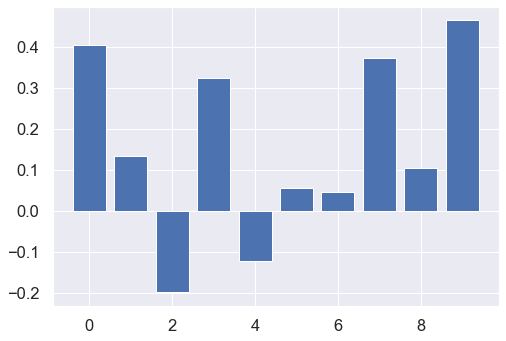

Feature: 0, Score: -0.04882
Feature: 1, Score: 0.28091
Feature: 2, Score: -0.29005
Feature: 3, Score: 0.21762
Feature: 4, Score: -0.01289
Feature: 5, Score: 0.93682
Feature: 6, Score: -0.68940
Feature: 7, Score: -0.12616
Feature: 8, Score: 0.33207
Feature: 9, Score: -0.13345


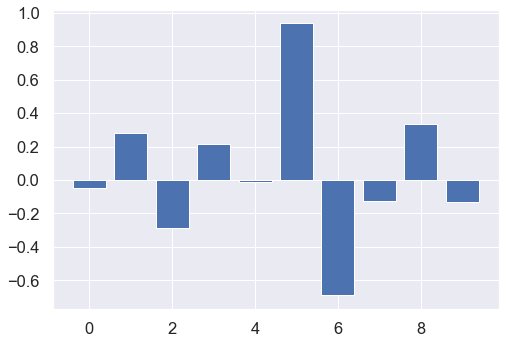

Feature: 0, Score: -0.01888
Feature: 1, Score: -0.13980
Feature: 2, Score: -0.01280
Feature: 3, Score: 0.23301
Feature: 4, Score: 0.22448
Feature: 5, Score: 0.47000
Feature: 6, Score: -0.36821
Feature: 7, Score: 0.11112
Feature: 8, Score: 0.38951
Feature: 9, Score: -0.09852


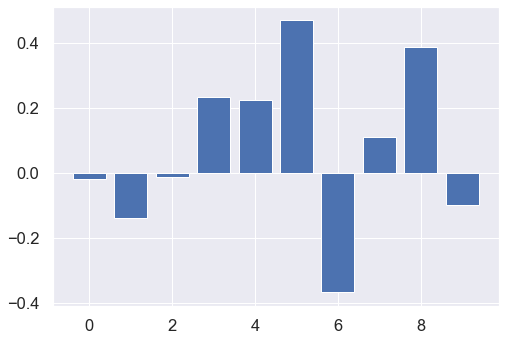

Feature: 0, Score: 0.10786
Feature: 1, Score: -0.11337
Feature: 2, Score: -0.17548
Feature: 3, Score: 0.39644
Feature: 4, Score: 0.23441
Feature: 5, Score: 0.15617
Feature: 6, Score: -0.38473
Feature: 7, Score: -0.05631
Feature: 8, Score: 0.28033
Feature: 9, Score: 0.20426


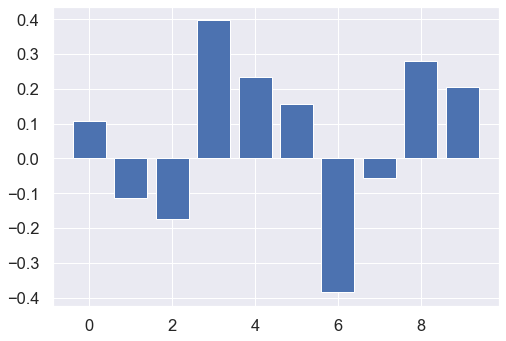

Feature: 0, Score: 0.78197
Feature: 1, Score: 0.11294
Feature: 2, Score: -0.42850
Feature: 3, Score: -0.03112
Feature: 4, Score: -0.66361
Feature: 5, Score: -0.17314
Feature: 6, Score: -0.52512
Feature: 7, Score: 0.98811
Feature: 8, Score: -0.08024
Feature: 9, Score: 0.09482


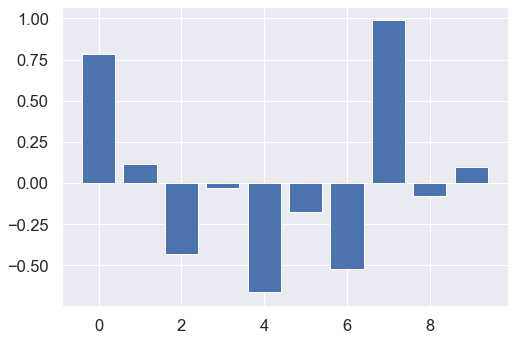

Feature: 0, Score: -0.03868
Feature: 1, Score: -0.64813
Feature: 2, Score: -0.26099
Feature: 3, Score: 1.17028
Feature: 4, Score: 0.38771
Feature: 5, Score: -0.20478
Feature: 6, Score: -0.03115
Feature: 7, Score: 0.28427
Feature: 8, Score: 0.21615
Feature: 9, Score: 0.01902


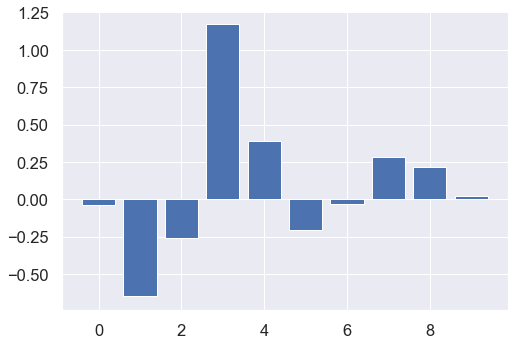

Feature: 0, Score: 0.10308
Feature: 1, Score: -0.25045
Feature: 2, Score: 0.00961
Feature: 3, Score: 0.15114
Feature: 4, Score: 0.25182
Feature: 5, Score: 0.23626
Feature: 6, Score: -0.01637
Feature: 7, Score: 0.05794
Feature: 8, Score: 0.33986
Feature: 9, Score: 0.19730


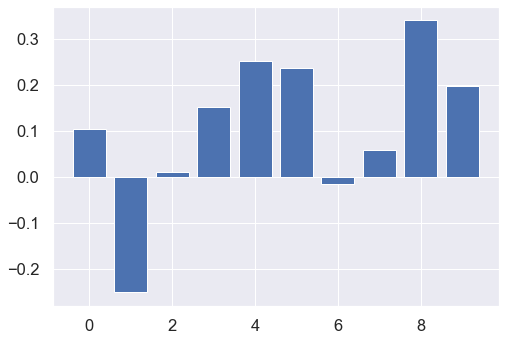

Feature: 0, Score: -0.03390
Feature: 1, Score: -0.15504
Feature: 2, Score: 0.10596
Feature: 3, Score: -0.03601
Feature: 4, Score: 0.24320
Feature: 5, Score: 0.24109
Feature: 6, Score: -0.14608
Feature: 7, Score: 0.14937
Feature: 8, Score: 0.40840
Feature: 9, Score: 0.20732


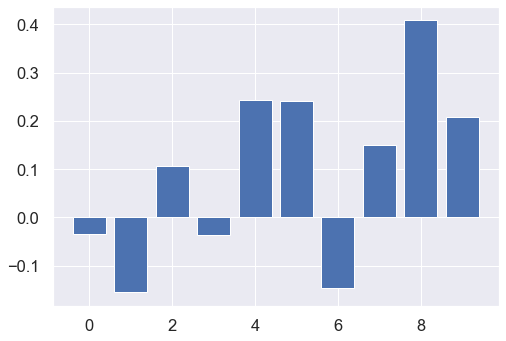

Feature: 0, Score: 0.08451
Feature: 1, Score: -0.19159
Feature: 2, Score: -1.50237
Feature: 3, Score: 2.12210
Feature: 4, Score: -0.55397
Feature: 5, Score: 0.40259
Feature: 6, Score: -0.83885
Feature: 7, Score: 0.83813
Feature: 8, Score: -0.07319
Feature: 9, Score: -0.21515


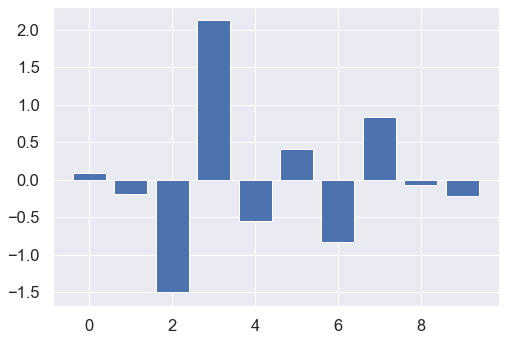

Feature: 0, Score: 0.31130
Feature: 1, Score: 0.19256
Feature: 2, Score: 0.01501
Feature: 3, Score: -0.30657
Feature: 4, Score: 0.07012
Feature: 5, Score: 0.59559
Feature: 6, Score: -0.41895
Feature: 7, Score: -0.15377
Feature: 8, Score: 0.33740
Feature: 9, Score: 0.13752


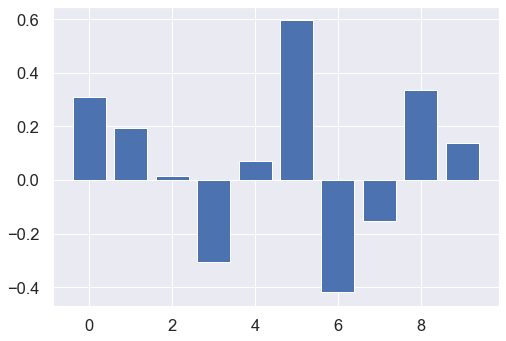

Feature: 0, Score: 0.17172
Feature: 1, Score: -0.11995
Feature: 2, Score: -0.02878
Feature: 3, Score: 0.49295
Feature: 4, Score: 0.18474
Feature: 5, Score: -0.40252
Feature: 6, Score: -0.04380
Feature: 7, Score: 0.28151
Feature: 8, Score: 0.11098
Feature: 9, Score: 0.37309


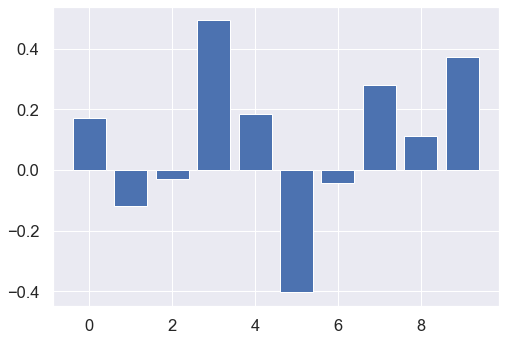

Feature: 0, Score: -0.18835
Feature: 1, Score: 0.43475
Feature: 2, Score: -0.22531
Feature: 3, Score: 0.65995
Feature: 4, Score: -0.04411
Feature: 5, Score: 0.85678
Feature: 6, Score: -0.55230
Feature: 7, Score: -0.04485
Feature: 8, Score: 0.10690
Feature: 9, Score: -0.47230


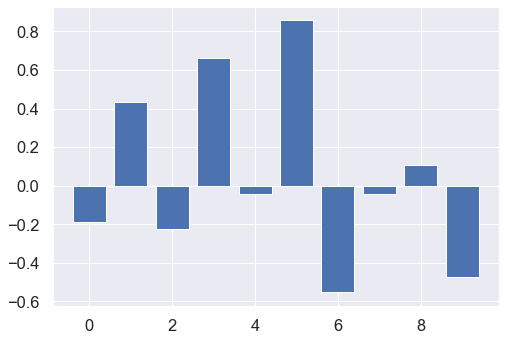

Feature: 0, Score: 0.42773
Feature: 1, Score: -0.13123
Feature: 2, Score: 0.01814
Feature: 3, Score: -0.12618
Feature: 4, Score: 0.24495
Feature: 5, Score: 0.13311
Feature: 6, Score: 0.12636
Feature: 7, Score: -0.27074
Feature: 8, Score: 0.26061
Feature: 9, Score: 0.52626


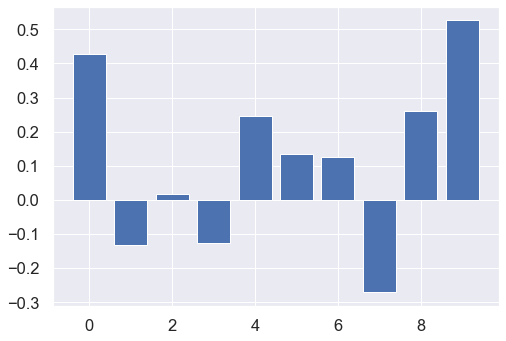

Feature: 0, Score: 0.51943
Feature: 1, Score: 0.98603
Feature: 2, Score: -0.52036
Feature: 3, Score: -0.29696
Feature: 4, Score: -0.87186
Feature: 5, Score: 0.50738
Feature: 6, Score: -0.57676
Feature: 7, Score: 0.48504
Feature: 8, Score: -0.11264
Feature: 9, Score: 0.39211


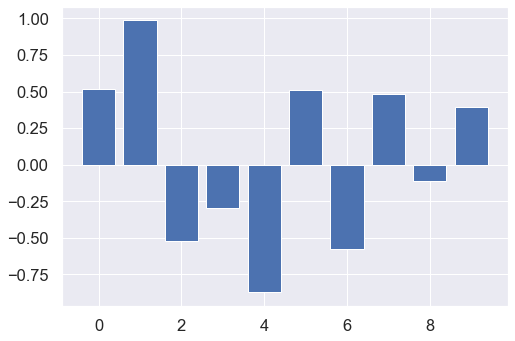

Feature: 0, Score: 0.01757
Feature: 1, Score: 0.13451
Feature: 2, Score: -0.84126
Feature: 3, Score: 1.39283
Feature: 4, Score: -0.34842
Feature: 5, Score: 0.09681
Feature: 6, Score: -0.55051
Feature: 7, Score: 0.71576
Feature: 8, Score: -0.02058
Feature: 9, Score: 0.10916


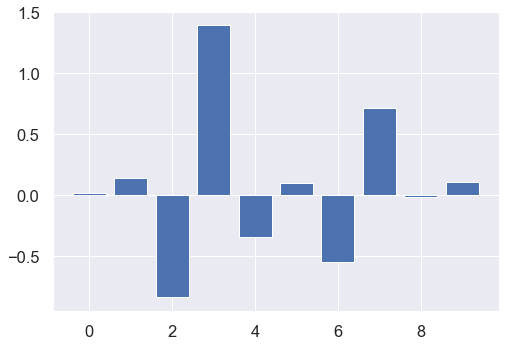

Feature: 0, Score: -0.15154
Feature: 1, Score: -0.24654
Feature: 2, Score: -0.44556
Feature: 3, Score: 0.79669
Feature: 4, Score: 0.17284
Feature: 5, Score: -0.32059
Feature: 6, Score: -0.19801
Feature: 7, Score: 0.19178
Feature: 8, Score: 0.20597
Feature: 9, Score: 0.63705


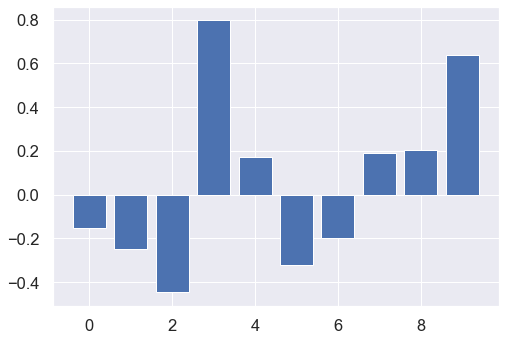

Feature: 0, Score: 0.29538
Feature: 1, Score: -0.29953
Feature: 2, Score: -0.06159
Feature: 3, Score: 0.49705
Feature: 4, Score: 0.06159
Feature: 5, Score: -0.16273
Feature: 6, Score: -0.19831
Feature: 7, Score: 0.60544
Feature: 8, Score: 0.16259
Feature: 9, Score: -0.05286


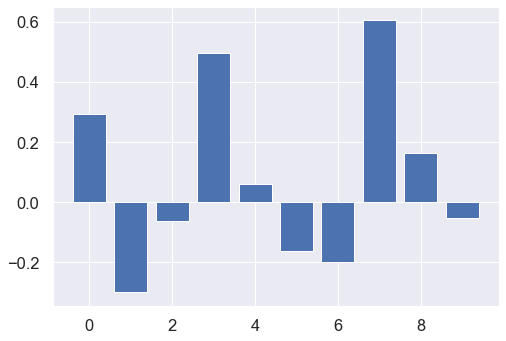

hazard  R2 for full model  MSE for full model  \
0   total Command Transitions                1.0                 0.0   
1    total Cultural Resources                1.0                 0.0   
2               total Traffic                1.0                 0.0   
3     total Hazardous Terrain                1.0                 0.0   
4        total Law Violations                1.0                 0.0   
5             total Livestock                1.0                 0.0   
6           total Evacuations                1.0                 0.0   
7              total Injuries                1.0                 0.0   
8         total Military Base                1.0                 0.0   
9        total Infrastructure                1.0                 0.0   
10      total Extreme Weather                1.0                 0.0   
11           total Ecological                1.0                 0.0   
12      total Resource Issues                1.0                 0.0   
13               total Floods                1.0                 0.0   
14   total Inaccurate Mapping                1.0                 0.0   
15     total Aerial Grounding                1.0                 0.0   
16          total Dry Weather                1.0                 0.0   

    Fire Frequency removed score  total Days Fires Burned removed score  \
0                          0.706                                  0.948   
1                          0.995                                  0.731   
2                          0.999                                  0.939   
3                          0.977                                  0.959   
4                         -0.656                                  0.944   
5                          0.998                                 -0.114   
6                          0.979                                  0.795   
7                          0.998                                  0.927   
8                          0.983                                  0.859   
9                          0.768                                  0.856   
10                         0.942                                  0.954   
11                         0.893                                  0.072   
12                         0.628                                  0.943   
13                         0.102                                 -4.246   
14                         0.999                                  0.928   
15                         0.962                                  0.836   
16                         0.790                                  0.650   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                    0.893                              0.785   
1                                    0.735                              0.886   
2                                    1.000                              0.879   
3                                    0.910                              0.646   
4                                    0.256                              0.997   
5                                    0.833                             -1.571   
6                                    1.000                              0.947   
7                                    0.969                              0.997   
8                                   -6.999                            -11.229   
9                                    0.999                              0.742   
10                                   0.998                              0.448   
11                                   0.770                             -0.513   
12                                   0.999                              0.963   
13                                  -0.349                              0.663   
14                                  -1.619                             -4.501   
15                                   0.506                             -0.210  

hazard  R2 for full model  MSE for full model  \
0   total Command Transitions                1.0                 0.0   
1    total Cultural Resources                1.0                 0.0   
2               total Traffic                1.0                 0.0   
3     total Hazardous Terrain                1.0                 0.0   
4        total Law Violations                1.0                 0.0   
5             total Livestock                1.0                 0.0   
6           total Evacuations                1.0                 0.0   
7              total Injuries                1.0                 0.0   
8         total Military Base                1.0                 0.0   
9        total Infrastructure                1.0                 0.0   
10      total Extreme Weather                1.0                 0.0   
11           total Ecological                1.0                 0.0   
12      total Resource Issues                1.0                 0.0   
13               total Floods                1.0                 0.0   
14   total Inaccurate Mapping                1.0                 0.0   
15     total Aerial Grounding                1.0                 0.0   
16          total Dry Weather                1.0                 0.0   

    Fire Frequency removed score  total Days Fires Burned removed score  \
0                          0.294                                  0.052   
1                          0.005                                  0.269   
2                          0.001                                  0.061   
3                          0.023                                  0.041   
4                          1.656                                  0.056   
5                          0.002                                  1.114   
6                          0.021                                  0.205   
7                          0.002                                  0.073   
8                          0.017                                  0.141   
9                          0.232                                  0.144   
10                         0.058                                  0.046   
11                         0.107                                  0.928   
12                         0.372                                  0.057   
13                         0.898                                  5.246   
14                         0.001                                  0.072   
15                         0.038                                  0.164   
16                         0.210                                  0.350   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                    0.107                              0.215   
1                                    0.265                              0.114   
2                                    0.000                              0.121   
3                                    0.090                              0.354   
4                                    0.744                              0.003   
5                                    0.167                              2.571   
6                                    0.000                              0.053   
7                                    0.031                              0.003   
8                                    7.999                             12.229   
9                                    0.001                              0.258   
10                                   0.002                              0.552   
11                                   0.230                              1.513   
12                                   0.001                              0.037   
13                                   1.349                              0.337   
14                                   2.619                              5.501   
15                                   0.494                              1.210  

In [54]:
predictors = [p for p in totals_scaled]
hazards = [h.replace("total ","") for h in hazard_freqs_scaled]
results_df, delta_df = multiple_reg_feature_importance(predictors, hazards,  correlation_mat_total)
display(results_df, delta_df)

Feature: 0, Score: 0.10749
Feature: 1, Score: 0.27971
Feature: 2, Score: -0.23440
Feature: 3, Score: 0.70111
Feature: 4, Score: -0.08353
Feature: 5, Score: -0.02882
Feature: 6, Score: -0.05097
Feature: 7, Score: 0.04846
Feature: 8, Score: 0.36732
Feature: 9, Score: 0.05868


C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


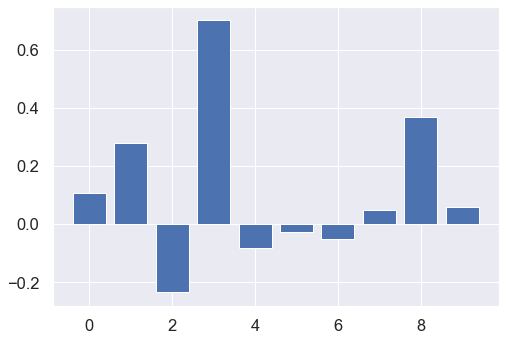

Feature: 0, Score: -0.22613
Feature: 1, Score: 0.00197
Feature: 2, Score: -0.39789
Feature: 3, Score: 0.70497
Feature: 4, Score: -0.04585
Feature: 5, Score: 0.21346
Feature: 6, Score: -0.54556
Feature: 7, Score: 0.17464
Feature: 8, Score: 0.52300
Feature: 9, Score: -0.22158


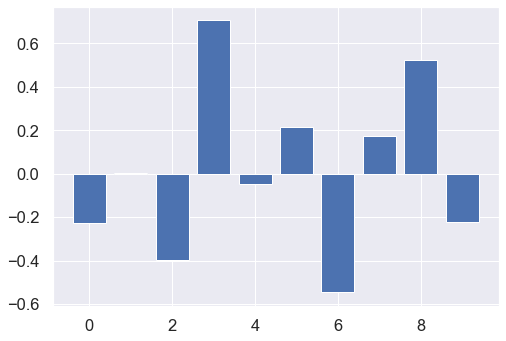

Feature: 0, Score: 0.21647
Feature: 1, Score: -0.01814
Feature: 2, Score: 0.13585
Feature: 3, Score: 0.13321
Feature: 4, Score: 0.13561
Feature: 5, Score: -0.06651
Feature: 6, Score: -0.29465
Feature: 7, Score: 0.25970
Feature: 8, Score: 0.27203
Feature: 9, Score: -0.02561


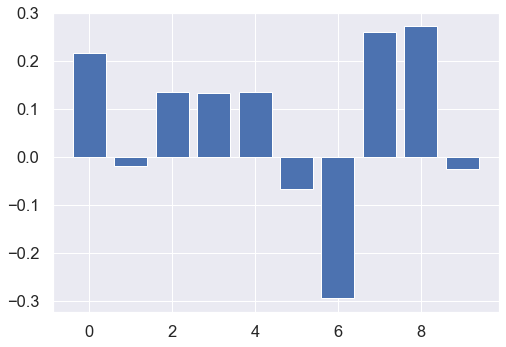

Feature: 0, Score: 0.22320
Feature: 1, Score: -0.18638
Feature: 2, Score: -0.05981
Feature: 3, Score: 0.38841
Feature: 4, Score: 0.18445
Feature: 5, Score: -0.24506
Feature: 6, Score: -0.13911
Feature: 7, Score: -0.03818
Feature: 8, Score: 0.34966
Feature: 9, Score: 0.03582


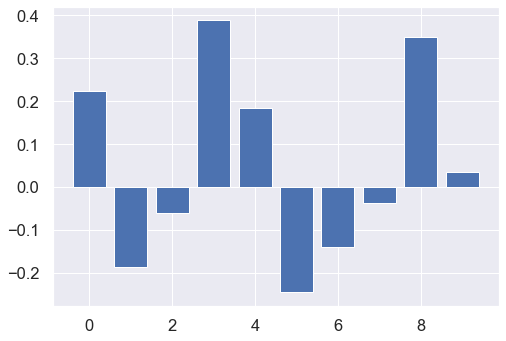

Feature: 0, Score: 0.84797
Feature: 1, Score: 0.18926
Feature: 2, Score: -0.44075
Feature: 3, Score: -0.11576
Feature: 4, Score: -0.72205
Feature: 5, Score: -0.03677
Feature: 6, Score: -0.55392
Feature: 7, Score: 0.85751
Feature: 8, Score: 0.03170
Feature: 9, Score: -0.03971


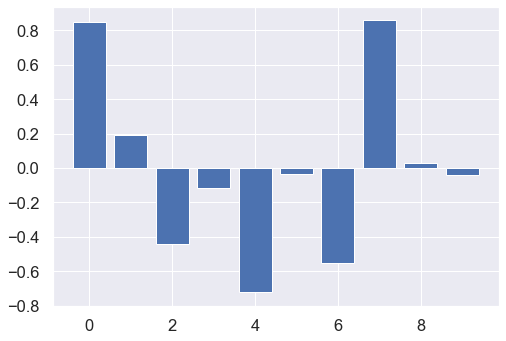

Feature: 0, Score: 0.06257
Feature: 1, Score: -0.24594
Feature: 2, Score: 0.06163
Feature: 3, Score: 0.30154
Feature: 4, Score: 0.38170
Feature: 5, Score: -0.10766
Feature: 6, Score: -0.00093
Feature: 7, Score: -0.18579
Feature: 8, Score: 0.30829
Feature: 9, Score: 0.20035


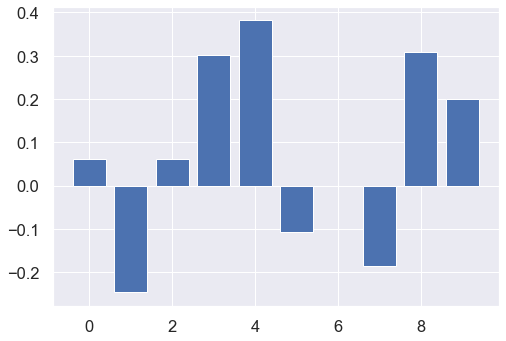

Feature: 0, Score: 0.44274
Feature: 1, Score: -0.19273
Feature: 2, Score: 0.11465
Feature: 3, Score: 0.05630
Feature: 4, Score: 0.28072
Feature: 5, Score: 0.16642
Feature: 6, Score: -0.07532
Feature: 7, Score: -0.02866
Feature: 8, Score: 0.18489
Feature: 9, Score: 0.15803


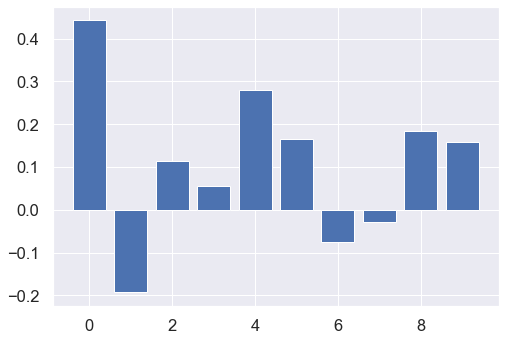

Feature: 0, Score: 0.02150
Feature: 1, Score: -0.07079
Feature: 2, Score: 0.02629
Feature: 3, Score: 0.36199
Feature: 4, Score: 0.20059
Feature: 5, Score: -0.02628
Feature: 6, Score: -0.17737
Feature: 7, Score: 0.13620
Feature: 8, Score: 0.36486
Feature: 9, Score: 0.06000


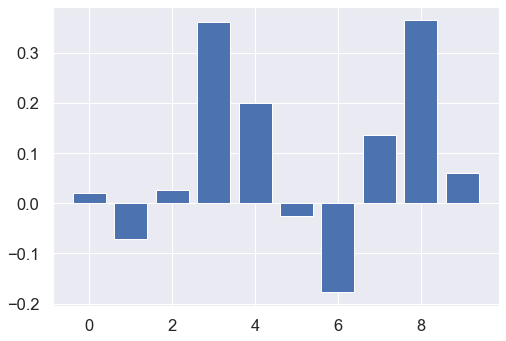

Feature: 0, Score: 0.27469
Feature: 1, Score: 0.05938
Feature: 2, Score: -1.06533
Feature: 3, Score: 1.33583
Feature: 4, Score: -0.66288
Feature: 5, Score: 0.06242
Feature: 6, Score: -0.32090
Feature: 7, Score: 0.56290
Feature: 8, Score: 0.69936
Feature: 9, Score: -0.20056


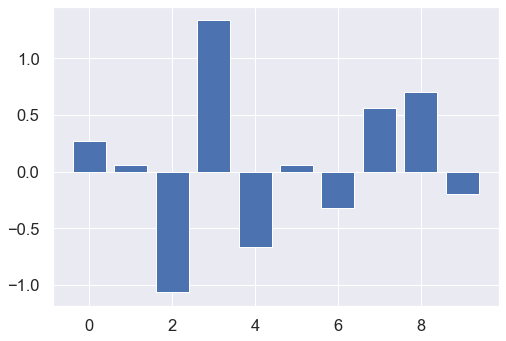

Feature: 0, Score: 0.36608
Feature: 1, Score: -0.02283
Feature: 2, Score: 0.25810
Feature: 3, Score: -0.36832
Feature: 4, Score: 0.29957
Feature: 5, Score: 0.21607
Feature: 6, Score: -0.29378
Feature: 7, Score: -0.05058
Feature: 8, Score: 0.00137
Feature: 9, Score: 0.30482


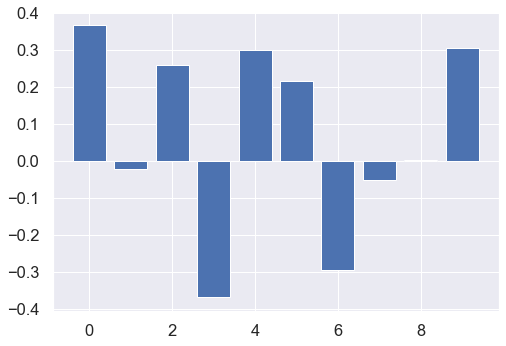

Feature: 0, Score: 0.38019
Feature: 1, Score: -0.12528
Feature: 2, Score: 0.00616
Feature: 3, Score: 0.41925
Feature: 4, Score: 0.17383
Feature: 5, Score: -0.31301
Feature: 6, Score: 0.14706
Feature: 7, Score: -0.10435
Feature: 8, Score: 0.27999
Feature: 9, Score: 0.10104


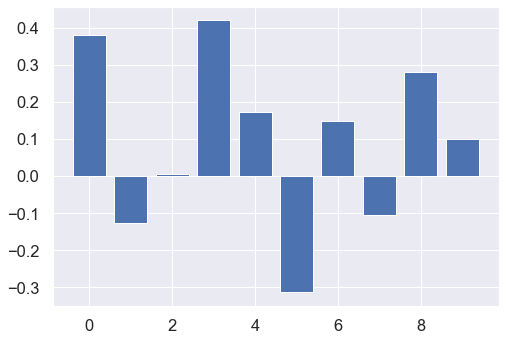

Feature: 0, Score: -0.10451
Feature: 1, Score: 0.40954
Feature: 2, Score: 0.07916
Feature: 3, Score: 0.07321
Feature: 4, Score: 0.17956
Feature: 5, Score: 0.78703
Feature: 6, Score: -0.59647
Feature: 7, Score: -0.28109
Feature: 8, Score: 0.10495
Feature: 9, Score: -0.22540


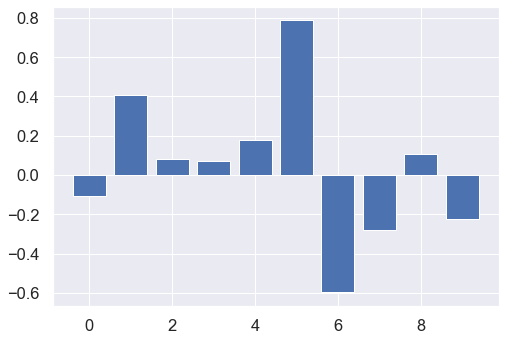

Feature: 0, Score: 0.26262
Feature: 1, Score: -0.07337
Feature: 2, Score: 0.02580
Feature: 3, Score: 0.33210
Feature: 4, Score: 0.19576
Feature: 5, Score: -0.17888
Feature: 6, Score: 0.02606
Feature: 7, Score: -0.07342
Feature: 8, Score: 0.26703
Feature: 9, Score: 0.14196


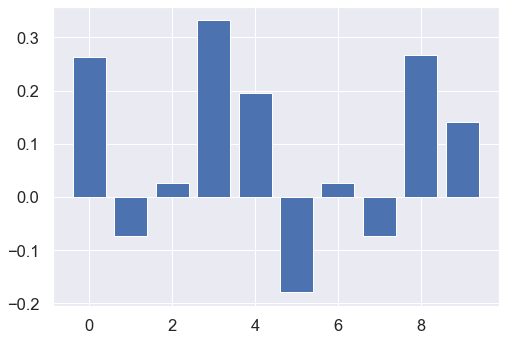

Feature: 0, Score: 0.12060
Feature: 1, Score: 0.58796
Feature: 2, Score: -0.55054
Feature: 3, Score: 0.38906
Feature: 4, Score: -0.45604
Feature: 5, Score: -0.21133
Feature: 6, Score: 0.25006
Feature: 7, Score: 0.17036
Feature: 8, Score: 0.06112
Feature: 9, Score: 0.97592


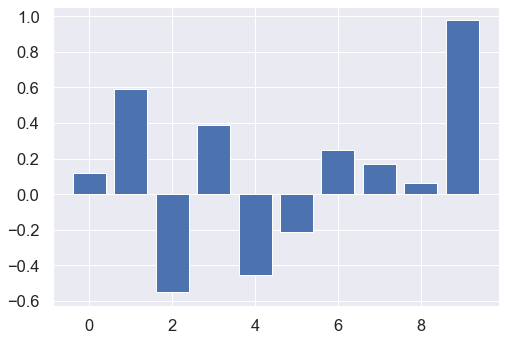

Feature: 0, Score: 0.08729
Feature: 1, Score: 0.45979
Feature: 2, Score: -0.76103
Feature: 3, Score: 1.03715
Feature: 4, Score: -0.52310
Feature: 5, Score: 0.13739
Feature: 6, Score: -0.42962
Feature: 7, Score: 0.30548
Feature: 8, Score: 0.51679
Feature: 9, Score: -0.09655


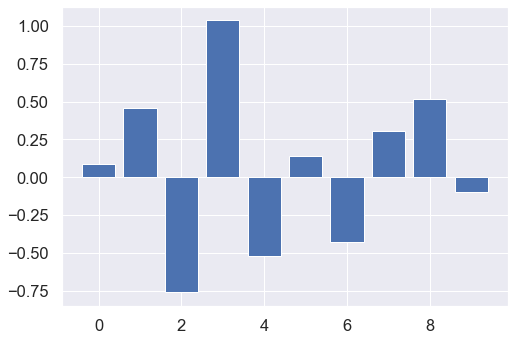

Feature: 0, Score: 0.11091
Feature: 1, Score: -0.16605
Feature: 2, Score: -0.25066
Feature: 3, Score: 0.50765
Feature: 4, Score: 0.05131
Feature: 5, Score: -0.26135
Feature: 6, Score: -0.35273
Feature: 7, Score: 0.16292
Feature: 8, Score: 0.46647
Feature: 9, Score: 0.05074


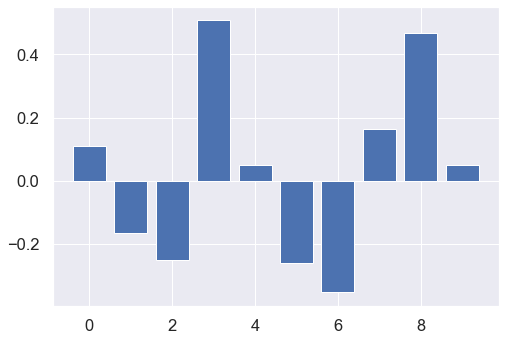

Feature: 0, Score: 0.87601
Feature: 1, Score: -0.07440
Feature: 2, Score: -0.20280
Feature: 3, Score: 0.26788
Feature: 4, Score: -0.14022
Feature: 5, Score: 0.34492
Feature: 6, Score: -0.32201
Feature: 7, Score: 0.35015
Feature: 8, Score: 0.27525
Feature: 9, Score: -0.14224


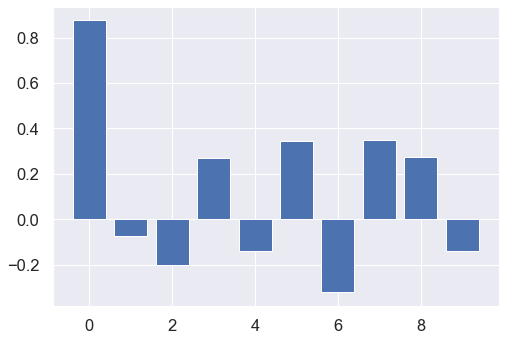

hazard  R2 for full model  MSE for full model  \
0   total Command Transitions                1.0                 0.0   
1    total Cultural Resources                1.0                 0.0   
2               total Traffic                1.0                 0.0   
3     total Hazardous Terrain                1.0                 0.0   
4        total Law Violations                1.0                 0.0   
5             total Livestock                1.0                 0.0   
6           total Evacuations                1.0                 0.0   
7              total Injuries                1.0                 0.0   
8         total Military Base                1.0                 0.0   
9        total Infrastructure                1.0                 0.0   
10      total Extreme Weather                1.0                 0.0   
11           total Ecological                1.0                 0.0   
12      total Resource Issues                1.0                 0.0   
13               total Floods                1.0                 0.0   
14   total Inaccurate Mapping                1.0                 0.0   
15     total Aerial Grounding                1.0                 0.0   
16          total Dry Weather                1.0                 0.0   

    Fire Frequency removed score  total Days Fires Burned removed score  \
0                          0.978                                  0.754   
1                          0.835                                  1.000   
2                          0.897                                  0.999   
3                          0.841                                  0.821   
4                         -0.964                                  0.841   
5                          0.990                                  0.757   
6                          0.586                                  0.873   
7                          0.999                                  0.983   
8                          0.762                                  0.982   
9                          0.621                                  0.998   
10                         0.635                                  0.936   
11                         0.968                                  0.201   
12                         0.824                                  0.978   
13                         0.965                                 -0.367   
14                         0.980                                  0.099   
15                         0.964                                  0.870   
16                        -0.228                                  0.986   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                    0.841                             -0.092   
1                                    0.233                             -0.844   
2                                    0.939                              0.955   
3                                    0.983                              0.448   
4                                    0.206                              0.958   
5                                    0.986                              0.742   
6                                    0.958                              0.992   
7                                    0.998                              0.690   
8                                   -4.368                             -5.467   
9                                    0.718                              0.560   
10                                   1.000                              0.491   
11                                   0.972                              0.982   
12                                   0.997                              0.677   
13                                  -0.107                              0.576   
14                                  -1.280                             -2.244   
15                                   0.727                              0.143  

hazard  R2 for full model  MSE for full model  \
0   total Command Transitions                1.0                 0.0   
1    total Cultural Resources                1.0                 0.0   
2               total Traffic                1.0                 0.0   
3     total Hazardous Terrain                1.0                 0.0   
4        total Law Violations                1.0                 0.0   
5             total Livestock                1.0                 0.0   
6           total Evacuations                1.0                 0.0   
7              total Injuries                1.0                 0.0   
8         total Military Base                1.0                 0.0   
9        total Infrastructure                1.0                 0.0   
10      total Extreme Weather                1.0                 0.0   
11           total Ecological                1.0                 0.0   
12      total Resource Issues                1.0                 0.0   
13               total Floods                1.0                 0.0   
14   total Inaccurate Mapping                1.0                 0.0   
15     total Aerial Grounding                1.0                 0.0   
16          total Dry Weather                1.0                 0.0   

    Fire Frequency removed score  total Days Fires Burned removed score  \
0                          0.022                                  0.246   
1                          0.165                                  0.000   
2                          0.103                                  0.001   
3                          0.159                                  0.179   
4                          1.964                                  0.159   
5                          0.010                                  0.243   
6                          0.414                                  0.127   
7                          0.001                                  0.017   
8                          0.238                                  0.018   
9                          0.379                                  0.002   
10                         0.365                                  0.064   
11                         0.032                                  0.799   
12                         0.176                                  0.022   
13                         0.035                                  1.367   
14                         0.020                                  0.901   
15                         0.036                                  0.130   
16                         1.228                                  0.014   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                    0.159                              1.092   
1                                    0.767                              1.844   
2                                    0.061                              0.045   
3                                    0.017                              0.552   
4                                    0.794                              0.042   
5                                    0.014                              0.258   
6                                    0.042                              0.008   
7                                    0.002                              0.310   
8                                    5.368                              6.467   
9                                    0.282                              0.440   
10                                   0.000                              0.509   
11                                   0.028                              0.018   
12                                   0.003                              0.323   
13                                   1.107                              0.424   
14                                   2.280                              3.244   
15                                   0.273                              0.857  

In [55]:
predictors = [p for p in totals_scaled]
hazards = [h.replace("total ","") for h in fire_freqs_scaled]
results_df, delta_df = multiple_reg_feature_importance(predictors, hazards, correlation_mat_total_fires)
display(results_df, delta_df)

In [56]:
cols = [col for col in delta_df.columns if "MSE" in col]
delta_df.drop(cols, axis=1)

C:\Users\srandrad\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


hazard  R2 for full model  \
0   total Command Transitions                1.0   
1    total Cultural Resources                1.0   
2               total Traffic                1.0   
3     total Hazardous Terrain                1.0   
4        total Law Violations                1.0   
5             total Livestock                1.0   
6           total Evacuations                1.0   
7              total Injuries                1.0   
8         total Military Base                1.0   
9        total Infrastructure                1.0   
10      total Extreme Weather                1.0   
11           total Ecological                1.0   
12      total Resource Issues                1.0   
13               total Floods                1.0   
14   total Inaccurate Mapping                1.0   
15     total Aerial Grounding                1.0   
16          total Dry Weather                1.0   

    Fire Frequency removed score  total Days Fires Burned removed score  \
0                          0.022                                  0.246   
1                          0.165                                  0.000   
2                          0.103                                  0.001   
3                          0.159                                  0.179   
4                          1.964                                  0.159   
5                          0.010                                  0.243   
6                          0.414                                  0.127   
7                          0.001                                  0.017   
8                          0.238                                  0.018   
9                          0.379                                  0.002   
10                         0.365                                  0.064   
11                         0.032                                  0.799   
12                         0.176                                  0.022   
13                         0.035                                  1.367   
14                         0.020                                  0.901   
15                         0.036                                  0.130   
16                         1.228                                  0.014   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                    0.159                              1.092   
1                                    0.767                              1.844   
2                                    0.061                              0.045   
3                                    0.017                              0.552   
4                                    0.794                              0.042   
5                                    0.014                              0.258   
6                                    0.042                              0.008   
7                                    0.002                              0.310   
8                                    5.368                              6.467   
9                                    0.282                              0.440   
10                                   0.000                              0.509   
11                                   0.028                              0.018   
12                                   0.003                              0.323   
13                                   1.107                              0.424   
14                                   2.280                              3.244   
15                                   0.273                              0.857   
16                                   0.099                              0.132   

    total Personnel removed score  total Cost removed score  \
0                           0.014                     0.002   
1                           0.007                     0.149   
2                           0.042                     0.010   
3                       